<a href="https://colab.research.google.com/github/kschuler/analyses/blob/master/analysis_austinetal2020_revision_2020_09_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Austin et al 2020 Revision 
*Alison Austin, Kathryn Schuler, Sarah Furlong, Elissa Newport*

*   Analyzed by: Katie Schuler
*   Date processed: 2020-09-25
*   Revised ananlysis and figures for Austin et al 2020. 

## Setting up


In [2]:
# install packages for entropy analysis and mixed models 
install.packages("infotheo")
install.packages("lmerTest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load required libraries
library(tidyverse)
library(knitr)
library(broom)
library(infotheo)
library(lmerTest)

In [4]:
# print session info (computing environment at time of analysis)
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lmerTest_3.1-2  lme4_1.1-23     Matrix_1.2-18   infotheo_1.2.0 
 [5] broom_0.7.0     knitr_1.29      forcats_0.5.0   stringr_1.4.0  
 [9] dplyr_1.0.2     purrr_0.3.4     readr_1.3.1     tidyr_1.1.2    
[13] tibble_3.0.3    ggplot2_3.3.2   tidyverse_1.3.0

loaded vi

In [5]:
# theme to add to all plots to make them publication pretty
theme_set(theme_bw(base_size = 25))

In [ ]:
# load the trial by trial data
data <- read_csv('austinetal2020-exp123-production.csv') %>%
  # reclassify subject C176 as "old" because they are too old for the young age group
  mutate(ageLevel = ifelse(Subject == "C176", "old", ageLevel))

## All experiments


### Participants

In [8]:
# get n and age details for all participants by experiment and age level
# for revision with relaxed inclusion criteria
data %>% 
  group_by(Experiment, Language, ageLevel, Subject) %>%
  summarise(age = unique(Age)) %>%
  group_by(Experiment, Language, ageLevel) %>%
  summarise(n = n_distinct(Subject), ageMean = mean(age), ageSD = sd(age), ageMin = min(age), ageMax = max(age)) %>% 
  kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel' (override with `.groups` argument)

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Experiment   |Language                  |ageLevel |  n|   ageMean|     ageSD|    ageMin|    ageMax|
|:------------|:-------------------------|:--------|--:|---------:|---------:|---------:|---------:|
|Experiment 1 |67-33.Inconsistent        |adult    |  9| 20.521104| 1.3009704| 18.836413| 23.058179|
|Experiment 1 |67-33.Inconsistent        |young    | 15|  5.911568| 0.5966794|  4.941821|  6.776181|
|Experiment 1 |67-33.LexicallyConsistent |adult    |  8| 22.288843| 1.7502299| 20.041068| 25.623546|
|Experiment 1 |67-33.LexicallyConsistent |young    | 13|  6.118886| 0.5029871|  5.426420|  6.757016|
|Experiment 2 |60-40.Inconsistent        |adult    | 12| 20.529318| 1.1643024| 18.913073| 22.926762|
|Experiment 2 |60-40.Inconsistent        |old      | 16|  7.693532| 0.5177947|  6.965092|  8.665298|
|Experiment 2 |60-40.Inconsistent        |young    | 14|  5.980835| 0.4924442|  5.067762|  6.713210|
|Experiment 3 |40-20-4.Inconsistent      |adult    |  8| 20.274812| 1.5786691| 18.453114|

### Sanity check for main effects and interactions 

Do some plots to visualize the main effects and interactions in the Use of Dominant form models.


In [ ]:
dombyday <- data %>%
  # rename levels as requested by reviewers
  mutate(ageLevel = factor(ageLevel, levels = c("adult", "old", "young"), labels = c("adult", "older child", "young child"))) %>%
  mutate(Language = recode(Language, "67-33.Inconsistent" = "Inconsistent", "67-33.LexicallyConsistent" = "Lexically Consistent")) %>% 
  # get determiner use by Experiment, Language, ageLevel, and Day
  group_by(Experiment, Language, ageLevel, Subject, Day) %>% 
  summarise(n = n(), isDom = sum(isDominantDet), usageDets = isDom/n*100)

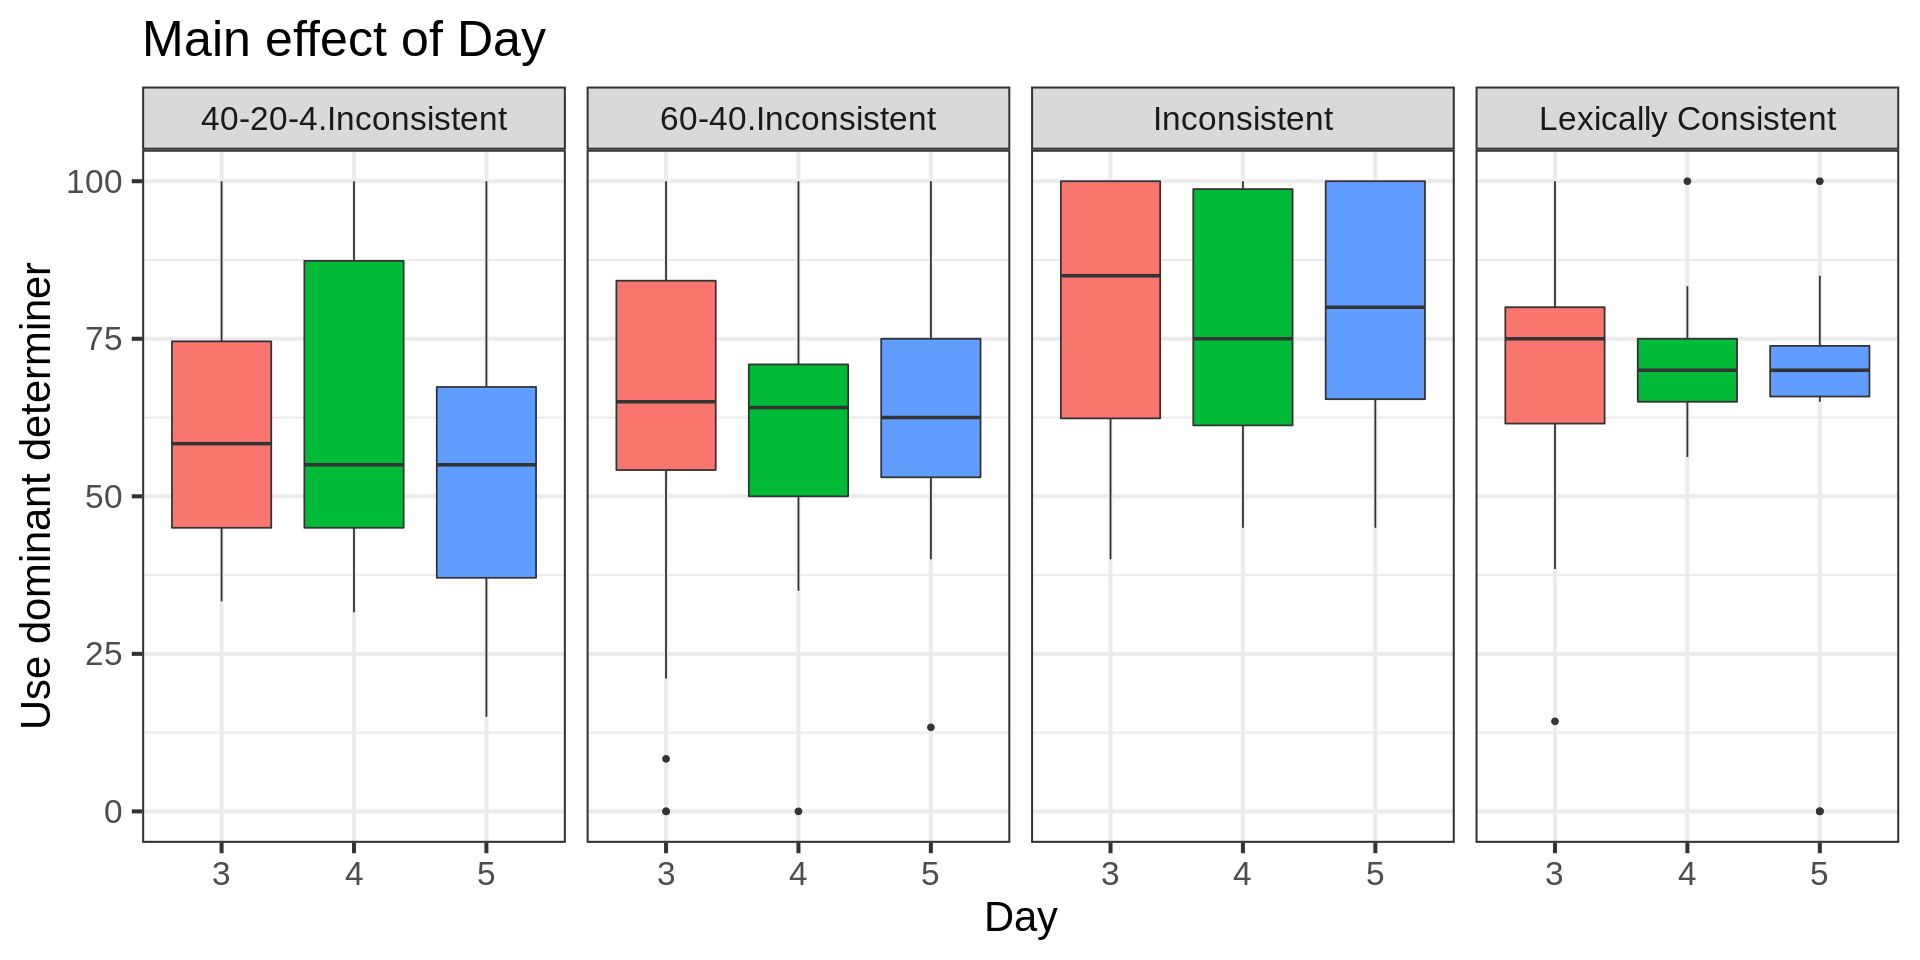

In [10]:
# visualize the main effect of Day by input Language
# based on the plot, there looks to be no main effect of day
options(repr.plot.width =16, repr.plot.height =8)

ggplot(dombyday, aes(as.factor(Day), usageDets, fill = as.factor(Day))) +
  facet_grid(.~ Language) +
  geom_boxplot() + labs(title = "Main effect of Day", y = "Use dominant determiner", x = "Day") +
  theme(legend.position = "None")

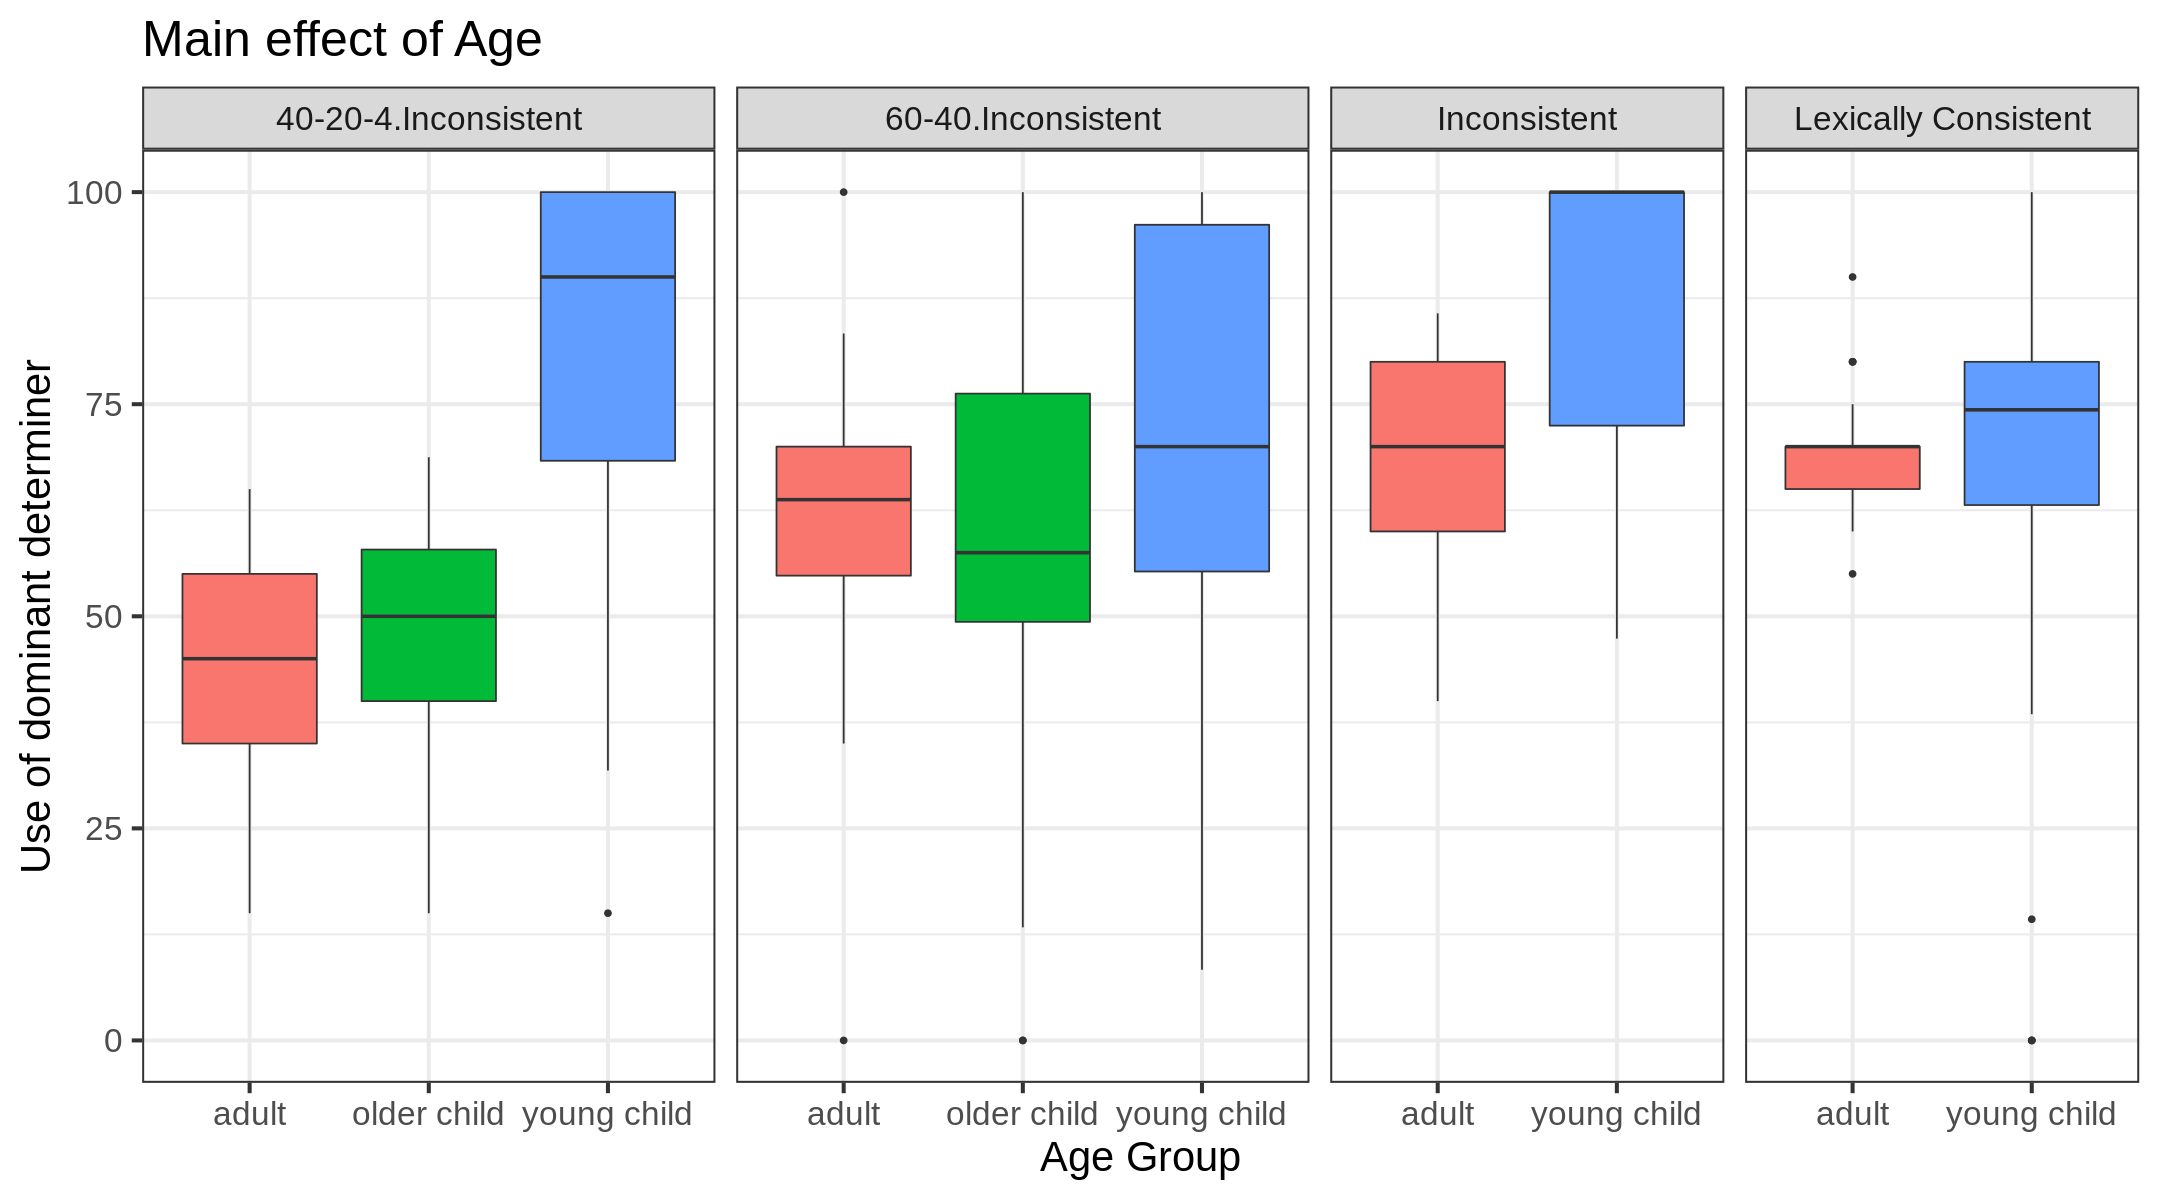

In [11]:
# visualize the main effect of Age
# Based on the plot, there is a clear effect of age in 40-20-4 and 67-33 inconsistent; 
# A main effect of age is less clear in 60-40 and 67-33 lexically consistent
options(repr.plot.width =18, repr.plot.height =10)

ggplot(dombyday, aes(as.factor(ageLevel), usageDets, fill = as.factor(ageLevel))) +
  facet_grid(.~ Language, space = "free", scales = "free") +
  geom_boxplot() + 
  labs(title = "Main effect of Age", y = "Use of dominant determiner", x = "Age Group") +
  theme(legend.position = "None")

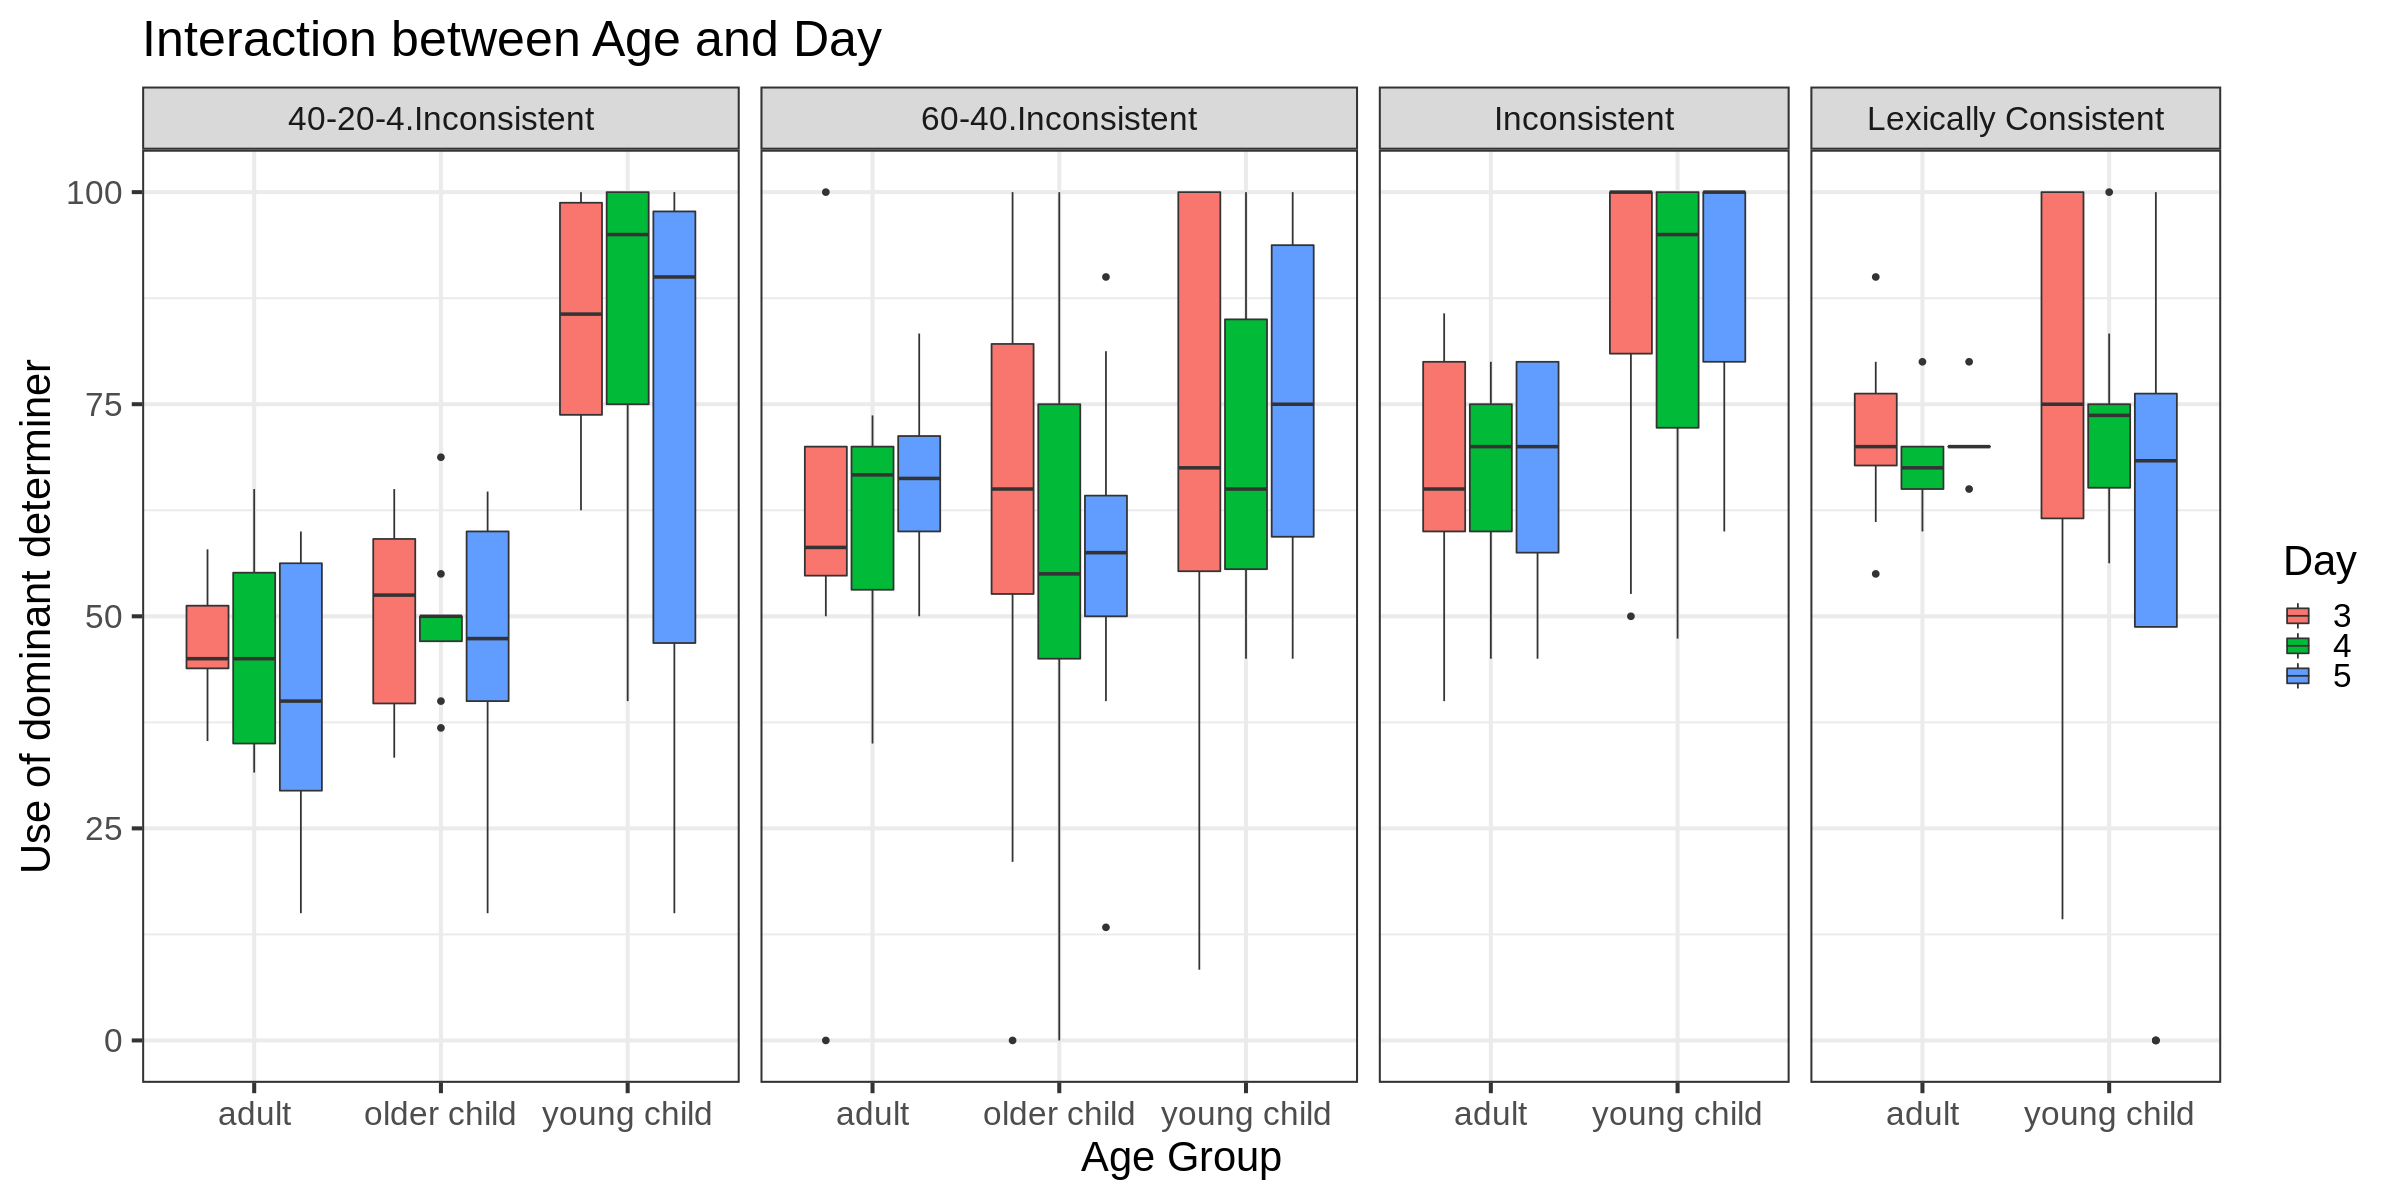

In [12]:
# Visualize interactions with day
# it's hard to tell from looking at this if there is a clear interaction between age group and day
options(repr.plot.width =20, repr.plot.height =10)

ggplot(dombyday, aes(as.factor(ageLevel), usageDets, fill = as.factor(Day))) +
  facet_grid(.~ Language, space = "free", scales = "free") +
  geom_boxplot() +
  labs(title = "Interaction between Age and Day", y = "Use of dominant determiner", x = "Age Group", fill = "Day")

## Experiment 1

### Figure 1

In [25]:
# get mean determiner use all experiments 
byDets <- data %>%
  # rename levels as requested by reviewers
  mutate(ageLevel = factor(ageLevel, levels = c("adult", "old", "young"), labels = c("adult", "older child", "young child"))) %>%
  mutate(Language = recode(Language, "67-33.Inconsistent" = "Inconsistent", "67-33.LexicallyConsistent" = "Lexically Consistent")) %>% 
  group_by(Experiment, Language, ageLevel, Subject) %>% 
  summarise(n = n(), isDom = sum(isDominantDet), usageDets = isDom/n*100)

byDets %>% group_by(Experiment, Language, ageLevel) %>%
   summarise(n = n(), meanUse = mean(usageDets), sdUse = sd(usageDets), semUse = sdUse/sqrt(n)) %>% kable


`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel' (override with `.groups` argument)

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Experiment   |Language             |ageLevel    |  n|  meanUse|     sdUse|   semUse|
|:------------|:--------------------|:-----------|--:|--------:|---------:|--------:|
|Experiment 1 |Inconsistent         |adult       |  9| 67.47071| 10.950577| 3.650192|
|Experiment 1 |Inconsistent         |young child | 15| 85.82218| 17.207110| 4.442857|
|Experiment 1 |Lexically Consistent |adult       |  8| 69.86351|  3.656150| 1.292644|
|Experiment 1 |Lexically Consistent |young child | 13| 67.31152| 18.274569| 5.068454|
|Experiment 2 |60-40.Inconsistent   |adult       | 12| 63.05868|  9.123183| 2.633636|
|Experiment 2 |60-40.Inconsistent   |older child | 16| 60.09212| 21.816414| 5.454103|
|Experiment 2 |60-40.Inconsistent   |young child | 14| 73.49100| 19.958843| 5.334225|
|Experiment 3 |40-20-4.Inconsistent |adult       |  8| 44.52489|  9.811713| 3.468964|
|Experiment 3 |40-20-4.Inconsistent |older child |  9| 49.45458|  7.546501| 2.515500|
|Experiment 3 |40-20-4.Inconsistent |young child | 1

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



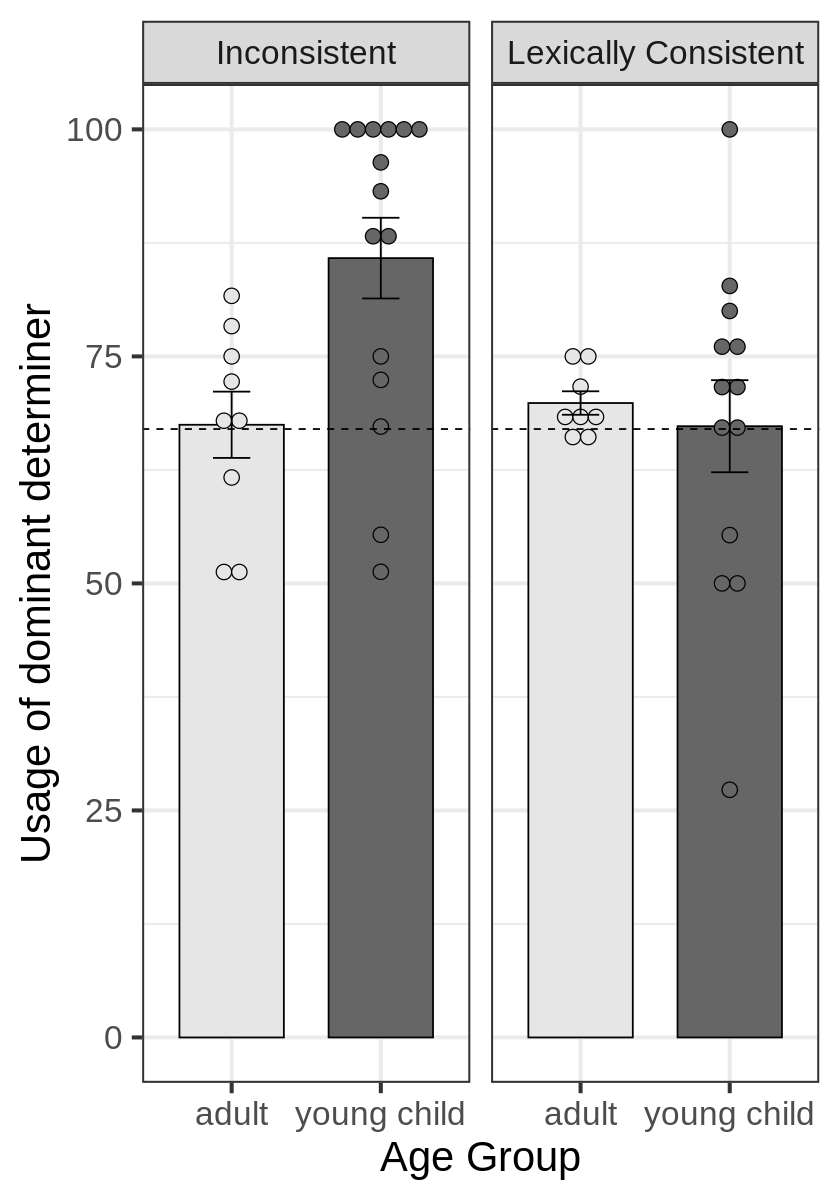

In [45]:
options(repr.plot.width =7, repr.plot.height =10)

# plot mean usage across of the dominant determiner (mean across all days)
ggplot(filter(byDets, Experiment == "Experiment 1"), aes(ageLevel, usageDets, fill = ageLevel)) +
  facet_grid(.~Language)+
  coord_cartesian(ylim = c(0, 100)) +
  stat_summary(fun.y = mean, geom = "bar", width = 0.7, color = "black") +
  geom_dotplot(binaxis='y', stackdir='center', dotsize = 0.7, color = "black", position = position_dodge()) +
  stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.25, position = position_dodge(0.9)) +  
  geom_hline(aes(yintercept=67), linetype="dashed", color = "black") +
  scale_fill_grey(start = 0.9, end = 0.4) +
  labs(x = "Age Group", y = "Usage of dominant determiner") +
  theme(legend.position = "None")

### Setup models

In [35]:
# setup the model factors so we can test the sepecific hypotheses
model_data_exp1 <- data %>% filter(Experiment == "Experiment 1") %>% 
  mutate( # make sure fixed effects are factors
        age.group = factor(ageLevel), 
        lang.condition = factor(Language, levels = c( "67-33.LexicallyConsistent", "67-33.Inconsistent")), 
        noun.type = factor(isDomNoun),
        # center the day variable on 0 so coefficients are meaningful
        centered.day = ifelse(Day == 3, -1, ifelse(Day == 4, 0, 1))) 


# use simple coding so the main effects are interprable
# for two levels
c2 <- contr.treatment(2)
my.coding2 <- matrix(rep(1/2, 2), ncol=1)
mysimple2 <- c2-my.coding2

# and for three levels
c3 <- contr.treatment(3)
my.coding3 <- matrix(rep(1/3, 6), ncol=2)
mysimple3 <- c3-my.coding3

# make sure our predictors are simple coded
# reference level is adult in the inconsistent consistent condition
contrasts(model_data_exp1$age.group) <- mysimple2
contrasts(model_data_exp1$lang.condition) <- mysimple2
contrasts(model_data_exp1$noun.type) <- mysimple2



In [99]:
# find best fitting random effects structure
# we'll use model comparison to determine the best fitting random effects structure
# this is a best practice when doing mixed effects models

# this model has random intercepts and slopes for Subjects
null1_exp1 <- glmer(isDominantDet ~ 1 + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

# the effect of day will vary between subjects. random intercepts for day and random slopes for each subject are influenced by day. 
null2_exp1 <- glmer(isDominantDet ~ 1 + (1 + centered.day |Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

# test if model fit is improved in null2
anova(null1_exp1, null2_exp1) %>% kable

boundary (singular) fit: see ?isSingular





|           | npar|      AIC|      BIC|    logLik| deviance|     Chisq| Df| Pr(>Chisq)|
|:----------|----:|--------:|--------:|---------:|--------:|---------:|--:|----------:|
|null1_exp1 |    2| 2221.951| 2233.193| -1108.975| 2217.951|        NA| NA|         NA|
|null2_exp1 |    4| 2225.841| 2248.326| -1108.921| 2217.841| 0.1097285|  2|  0.9466137|

### Use of dominant form

In [15]:
# do a logistic mixed effects regression
## maximal model
logistic_mixed_effects_exp1full.max <- glmer(isDominantDet ~ centered.day * lang.condition * age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of interaction of day removed
logistic_mixed_effects_exp1full.intday <- glmer(isDominantDet ~ centered.day + lang.condition * age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of interaction of age removed
logistic_mixed_effects_exp1full.intage <- glmer(isDominantDet ~ centered.day * lang.condition + age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))


## model with contribution of interaction of both age and day removed
logistic_mixed_effects_exp1full.int <- glmer(isDominantDet ~ centered.day + lang.condition + age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of age removed
logistic_mixed_effects_exp1full.age <- glmer(isDominantDet ~ centered.day + lang.condition + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of day removed
logistic_mixed_effects_exp1full.day <- glmer(isDominantDet ~ lang.condition + age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of condition removed
logistic_mixed_effects_exp1full.cond <- glmer(isDominantDet ~  centered.day + age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1),
                                control=glmerControl(optimizer="bobyqa"))




summary(logistic_mixed_effects_exp1full.max) 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: isDominantDet ~ centered.day * lang.condition * age.group + (1 |  
    Subject)
   Data: filter(model_data_exp1)
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2218.3   2268.9  -1100.1   2200.3     2032 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4072 -1.0336  0.5109  0.6456  1.4636 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.817    0.9039  
Number of obs: 2041, groups:  Subject, 45

Fixed effects:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                              1.230664   0.156718   7.853 4.07e-15
centered.day                            -0.005358   0.069217  -0.077   0.9383
lang.condition2                          0.665596   0.311850   2.134   0.0328
age.group2                               0.824628  

In [19]:
# does the interaction with day contribute to the overall fit?
anova(logistic_mixed_effects_exp1full.max, logistic_mixed_effects_exp1full.intday) %>% kable



|                                       | npar|      AIC|      BIC|    logLik| deviance|     Chisq| Df| Pr(>Chisq)|
|:--------------------------------------|----:|--------:|--------:|---------:|--------:|---------:|--:|----------:|
|logistic_mixed_effects_exp1full.intday |    6| 2212.392| 2246.119| -1100.196| 2200.392|        NA| NA|         NA|
|logistic_mixed_effects_exp1full.max    |    9| 2218.264| 2268.854| -1100.132| 2200.264| 0.1283615|  3|  0.9882291|

In [20]:
# does the interaction with condition contribute to the overall fit?
anova(logistic_mixed_effects_exp1full.max, logistic_mixed_effects_exp1full.intage) %>% kable



|                                       | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:--------------------------------------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|logistic_mixed_effects_exp1full.intage |    6| 2218.023| 2251.750| -1103.011| 2206.023|       NA| NA|         NA|
|logistic_mixed_effects_exp1full.max    |    9| 2218.264| 2268.854| -1100.132| 2200.264| 5.759243|  3|  0.1239295|

In [21]:
# main effect of age
anova(logistic_mixed_effects_exp1full.int, logistic_mixed_effects_exp1full.age) %>% kable



|                                    | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:-----------------------------------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|logistic_mixed_effects_exp1full.age |    4| 2220.872| 2243.357| -1106.436| 2212.872|       NA| NA|         NA|
|logistic_mixed_effects_exp1full.int |    5| 2216.074| 2244.180| -1103.037| 2206.074| 6.798312|  1|  0.0091244|

In [22]:
# main effect of day
anova(logistic_mixed_effects_exp1full.int, logistic_mixed_effects_exp1full.day) %>% kable



|                                    | npar|      AIC|      BIC|    logLik| deviance|     Chisq| Df| Pr(>Chisq)|
|:-----------------------------------|----:|--------:|--------:|---------:|--------:|---------:|--:|----------:|
|logistic_mixed_effects_exp1full.day |    4| 2214.079| 2236.564| -1103.039| 2206.079|        NA| NA|         NA|
|logistic_mixed_effects_exp1full.int |    5| 2216.074| 2244.180| -1103.037| 2206.074| 0.0053557|  1|   0.941661|

In [23]:
# main effect of cond
anova(logistic_mixed_effects_exp1full.int, logistic_mixed_effects_exp1full.cond) %>% kable



|                                     | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:------------------------------------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|logistic_mixed_effects_exp1full.cond |    4| 2219.693| 2242.178| -1105.847| 2211.693|       NA| NA|         NA|
|logistic_mixed_effects_exp1full.int  |    5| 2216.074| 2244.180| -1103.037| 2206.074| 5.619555|  1|  0.0177612|

### Regularization

In [46]:
# one sample proportion test for Experiment 1 
# this tells us whether our data differs from a baseline level. 
prop_test_exp1 <- model_data_exp1 %>% group_by(Experiment, Language, ageLevel) %>%
  summarise(doms = sum(isDominantDet), trials = length(isDominantDet)) %>%
  group_by(Language, ageLevel) %>%
  do(tidy(prop.test(x=.$doms, n=.$trials, p=0.67)))

prop_test_exp1 %>% kable

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Language                  |ageLevel |  estimate|  statistic|   p.value| parameter|  conf.low| conf.high|method                                               |alternative |
|:-------------------------|:--------|---------:|----------:|---------:|---------:|---------:|---------:|:----------------------------------------------------|:-----------|
|67-33.Inconsistent        |adult    | 0.6713996|  0.0003312| 0.9854805|         1| 0.6277133| 0.7123709|1-sample proportions test with continuity correction |two.sided   |
|67-33.Inconsistent        |young    | 0.8440208| 78.2444176| 0.0000000|         1| 0.8112239| 0.8721349|1-sample proportions test with continuity correction |two.sided   |
|67-33.LexicallyConsistent |adult    | 0.7008734|  1.8372765| 0.1752705|         1| 0.6562845| 0.7420341|1-sample proportions test with continuity correction |two.sided   |
|67-33.LexicallyConsistent |young    | 0.6978558|  1.6765728| 0.1953805|         1| 0.6557670| 0.7369315|1-sample proportions test wi

In [47]:
# do a one sample ttest against the input for Experiment 1 (by Language) (input = 67)
byDets %>% filter(Experiment == "Experiment 1") %>%
  group_by(Language, ageLevel) %>%
  do(tidy(t.test(x=.$usageDets, mu=67,  data=.))) %>%
  kable



|Language             |ageLevel    | estimate| statistic|   p.value| parameter| conf.low| conf.high|method            |alternative |
|:--------------------|:-----------|--------:|---------:|---------:|---------:|--------:|---------:|:-----------------|:-----------|
|Inconsistent         |adult       | 67.47071| 0.1289535| 0.9005775|         8| 59.05335|  75.88806|One Sample t-test |two.sided   |
|Inconsistent         |young child | 85.82218| 4.2365041| 0.0008296|        14| 76.29320|  95.35116|One Sample t-test |two.sided   |
|Lexically Consistent |adult       | 69.86351| 2.2152309| 0.0623143|         7| 66.80689|  72.92012|One Sample t-test |two.sided   |
|Lexically Consistent |young child | 67.31152| 0.0614618| 0.9520032|        12| 56.26830|  78.35473|One Sample t-test |two.sided   |

### Lexically consistent


In [113]:
# find best fitting random effects structure
# we'll use model comparison to determine the best fitting random effects structure
# this is a best practice when doing mixed effects models
# https://ademos.people.uic.edu/Chapter17.html#31_random_effects_structure

# this model has random intercepts and slopes for Subjects
null1_exp1lc <- glmer(isDominantDet ~ 1 + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

# models in between (e.g. (1 + centered.day | Subject) yield singular fit and were thus dropped)

# the effect of noun type will vary between subjects. random intercepts for noun type and random slopes for each subject are influenced by noun type. 
null2_exp1lc <- glmer(isDominantDet ~ 1 + (1 +  noun.type |Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

# day has a relationship with noun type that varies by subject. 
null3_exp1lc <- glmer(isDominantDet ~ 1 + (1 + centered.day + noun.type |Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

# test if model fit is improved in null2
anova(null1_exp1lc, null2_exp1lc, null3_exp1lc) %>% kable



|             | npar|       AIC|       BIC|    logLik|  deviance|     Chisq| Df| Pr(>Chisq)|
|:------------|----:|---------:|---------:|---------:|---------:|---------:|--:|----------:|
|null1_exp1lc |    2| 1171.0368| 1180.7935| -583.5184| 1167.0368|        NA| NA|         NA|
|null2_exp1lc |    4|  611.6417|  631.1550| -301.8209|  603.6417| 563.39509|  2|  0.0000000|
|null3_exp1lc |    7|  615.5778|  649.7261| -300.7889|  601.5778|   2.06389|  3|  0.5592525|

In [114]:
# do a logistic mixed effects regression predicting use of correct determiner
## maximal model
logistic_mixed_effects_exp1lc.max <- glmer(isLexDominantDet ~ centered.day * noun.type * age.group + (1 + noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

## with contribution of interaction with day removed
logistic_mixed_effects_exp1lc.intday <- glmer(isLexDominantDet ~ centered.day + noun.type * age.group + (1+ noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of interaction with age.group removed
logistic_mixed_effects_exp1lc.intage <- glmer(isLexDominantDet ~ centered.day * noun.type + age.group + (1+ noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of interaction removed
logistic_mixed_effects_exp1lc.int <- glmer(isLexDominantDet ~ centered.day + noun.type + age.group + (1+  noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of age removed
logistic_mixed_effects_exp1lc.age <- glmer(isLexDominantDet ~ centered.day + noun.type + (1+  noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))

## model with contribution of day removed
logistic_mixed_effects_exp1lc.day <- glmer(isLexDominantDet ~ noun.type + age.group + (1+  noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))


## model with contribution of noun removed
logistic_mixed_effects_exp1lc.noun <- glmer(isLexDominantDet ~ centered.day + age.group + (1+ noun.type|Subject), 
                                family = "binomial", data = filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))





summary(logistic_mixed_effects_exp1lc.max) 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: isLexDominantDet ~ centered.day * noun.type * age.group + (1 +  
    noun.type | Subject)
   Data: filter(model_data_exp1, lang.condition == "67-33.LexicallyConsistent")
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
   556.5    610.2   -267.2    534.5      960 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.9367  0.0922  0.1593  0.3344  1.2757 

Random effects:
 Groups  Name        Variance Std.Dev. Corr
 Subject (Intercept) 1.343    1.159        
         noun.type2  3.024    1.739    0.37
Number of obs: 971, groups:  Subject, 21

Fixed effects:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         2.91150    0.35963   8.096 5.69e-16 ***
centered.day                        0.55043    0.17726   3.105  0.00190 ** 
noun.type2               

In [115]:
# does the interaction with day contribute to the overall fit?
anova(logistic_mixed_effects_exp1lc.max, logistic_mixed_effects_exp1lc.intday) %>% kable



|                                     | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:------------------------------------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|logistic_mixed_effects_exp1lc.intday |    8| 576.9540| 615.9806| -280.4770| 560.9540|       NA| NA|         NA|
|logistic_mixed_effects_exp1lc.max    |   11| 556.4898| 610.1514| -267.2449| 534.4898| 26.46419|  3|    7.6e-06|

In [116]:
# main effect of age?
anova(logistic_mixed_effects_exp1lc.int, logistic_mixed_effects_exp1lc.age) %>% kable



|                                  | npar|      AIC|      BIC|    logLik| deviance|     Chisq| Df| Pr(>Chisq)|
|:---------------------------------|----:|--------:|--------:|---------:|--------:|---------:|--:|----------:|
|logistic_mixed_effects_exp1lc.age |    6| 573.1720| 602.4419| -280.5860| 561.1720|        NA| NA|         NA|
|logistic_mixed_effects_exp1lc.int |    7| 574.9622| 609.1105| -280.4811| 560.9622| 0.2097581|  1|  0.6469571|

In [117]:
# main effect of day?
anova(logistic_mixed_effects_exp1lc.int, logistic_mixed_effects_exp1lc.day) %>% kable



|                                  | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:---------------------------------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|logistic_mixed_effects_exp1lc.day |    6| 582.1659| 611.4359| -285.0830| 570.1659|       NA| NA|         NA|
|logistic_mixed_effects_exp1lc.int |    7| 574.9622| 609.1105| -280.4811| 560.9622| 9.203727|  1|  0.0024152|

In [118]:
# main effect of noun type?
anova(logistic_mixed_effects_exp1lc.int, logistic_mixed_effects_exp1lc.noun) %>% kable



|                                   | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:----------------------------------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|logistic_mixed_effects_exp1lc.noun |    6| 581.2130| 610.4830| -284.6065| 569.2130|       NA| NA|         NA|
|logistic_mixed_effects_exp1lc.int  |    7| 574.9622| 609.1105| -280.4811| 560.9622| 8.250826|  1|  0.0040733|

### Entropy

In [65]:
# get entropy for input in all experiments
forty = entropy(c("ka", "ka", "ka", "ka", "ka", "ka", "ka", "ka", "po", "po", "po", "ny", "gaw", "lee", "woo", "vay", "ha", "moy", "dou", "suh"))
sixtyseven = entropy(c("ka", "ka", "ka", "ka", "po", "po"))
sixty = entropy(c("ka", "ka", "ka", "po", "po"))

# and compute entropy by day 
condentropy_byday <- data %>%
  #filter(Subject != "C176") %>%
  group_by(Experiment, Language, ageLevel, Subject, Day) %>%
  summarise(entropy = entropy(recodedDet2),
            rule_lex = condentropy(recodedDet2, Noun)) %>%
  mutate(input = ifelse(Language == "67-33.Inconsistent", sixtyseven, 
                  ifelse(Language == "60-40.Inconsistent", sixty, 
                  ifelse(Language == "40-20-4.Inconsistent",forty , 0.674))))

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel', 'Subject' (override with `.groups` argument)



In [66]:
# show entropy overall for all conditions
condentropy_byday %>% 
  group_by(Experiment, Language, ageLevel, Subject) %>%
  summarise(meanEnt = mean(entropy)) %>%
  group_by(Experiment, Language, ageLevel) %>%
  summarise(n=n(), Mean = mean(meanEnt), SD = sd(meanEnt), SEM = SD/sqrt(n) ) %>% kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel' (override with `.groups` argument)

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Experiment   |Language                  |ageLevel |  n|      Mean|        SD|       SEM|
|:------------|:-------------------------|:--------|--:|---------:|---------:|---------:|
|Experiment 1 |67-33.Inconsistent        |adult    |  9| 0.5936056| 0.0745885| 0.0248628|
|Experiment 1 |67-33.Inconsistent        |young    | 15| 0.2417181| 0.2649373| 0.0684065|
|Experiment 1 |67-33.LexicallyConsistent |adult    |  8| 0.5987190| 0.0394359| 0.0139427|
|Experiment 1 |67-33.LexicallyConsistent |young    | 13| 0.4114308| 0.2568370| 0.0712338|
|Experiment 2 |60-40.Inconsistent        |adult    | 12| 0.6035665| 0.0819586| 0.0236594|
|Experiment 2 |60-40.Inconsistent        |old      | 16| 0.5348591| 0.1966703| 0.0491676|
|Experiment 2 |60-40.Inconsistent        |young    | 14| 0.4214958| 0.2821860| 0.0754174|
|Experiment 3 |40-20-4.Inconsistent      |adult    |  8| 0.9568920| 0.0870242| 0.0307677|
|Experiment 3 |40-20-4.Inconsistent      |old      |  9| 0.9019712| 0.1207489| 0.0402496|
|Experim

In [64]:
model_data_exp1_infotheo <- condentropy_byday %>% filter(Experiment == "Experiment 1", Language == "67-33.Inconsistent") %>% 
  mutate(age.group = factor(ageLevel), centered.day = ifelse(Day == 3, -1, ifelse(Day==4, 0, 1))) 

contrasts(model_data_exp1_infotheo$age.group) <- mysimple2


In [53]:
lme_exp1_entropy.max <- lmer(entropy ~ centered.day * age.group + (1|Subject), data = model_data_exp1_infotheo)

lme_exp1_entropy.int <- lmer(entropy ~ centered.day + age.group + (1|Subject), data = model_data_exp1_infotheo)

lme_exp1_entropy.day <- lmer(entropy ~ age.group + (1|Subject), data = model_data_exp1_infotheo)

lme_exp1_entropy.age <- lmer(entropy ~ centered.day + (1|Subject), data = model_data_exp1_infotheo)

summary(lme_exp1_entropy.max)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ centered.day * age.group + (1 | Subject)
   Data: model_data_exp1_infotheo

REML criterion at convergence: -3.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.85283 -0.44618 -0.05424  0.31023  2.41453 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.03657  0.1912  
 Residual             0.02503  0.1582  
Number of obs: 64, groups:  Subject, 24

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.41798    0.04541 21.50893   9.205 6.54e-09 ***
centered.day            -0.01150    0.02590 39.07590  -0.444 0.659578    
age.group2              -0.35209    0.09082 21.50893  -3.877 0.000841 ***
centered.day:age.group2 -0.03057    0.05181 39.07590  -0.590 0.558591    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          

In [54]:
# does the interaction with day contribute to the overall fit?
anova(lme_exp1_entropy.max, lme_exp1_entropy.int) %>% kable

refitting model(s) with ML (instead of REML)





|                     | npar|       AIC|       BIC|   logLik|  deviance|     Chisq| Df| Pr(>Chisq)|
|:--------------------|----:|---------:|---------:|--------:|---------:|---------:|--:|----------:|
|lme_exp1_entropy.int |    5| -10.45788| 0.3365316| 10.22894| -20.45788|        NA| NA|         NA|
|lme_exp1_entropy.max |    6|  -8.81691| 4.1363889| 10.40845| -20.81691| 0.3590258|  1|  0.5490478|

In [55]:
# main effect of age?
anova(lme_exp1_entropy.int, lme_exp1_entropy.age) %>% kable

refitting model(s) with ML (instead of REML)





|                     | npar|         AIC|       BIC|    logLik|   deviance|    Chisq| Df| Pr(>Chisq)|
|:--------------------|----:|-----------:|---------:|---------:|----------:|--------:|--:|----------:|
|lme_exp1_entropy.age |    4|  -0.0285088| 8.6070235|  4.014254|  -8.028509|       NA| NA|         NA|
|lme_exp1_entropy.int |    5| -10.4578838| 0.3365316| 10.228942| -20.457884| 12.42938|  1|  0.0004226|

In [56]:
# main effect of day?
anova(lme_exp1_entropy.int, lme_exp1_entropy.day) %>% kable

refitting model(s) with ML (instead of REML)





|                     | npar|       AIC|        BIC|   logLik|  deviance|   Chisq| Df| Pr(>Chisq)|
|:--------------------|----:|---------:|----------:|--------:|---------:|-------:|--:|----------:|
|lme_exp1_entropy.day |    4| -12.10237| -3.4668415| 10.05119| -20.10237|      NA| NA|         NA|
|lme_exp1_entropy.int |    5| -10.45788|  0.3365316| 10.22894| -20.45788| 0.35551|  1|  0.5510105|

## Experiment 2

In [69]:
model_data_exp2 <- data %>% filter(Experiment == "Experiment 2") %>% 
  mutate( # make sure fixed effects are factors
        age.group = factor(ageLevel), 
        # center the day variable on 0 so coefficients are meaningful
        centered.day = ifelse(Day == 3,-1, ifelse(Day == 4, 0, 1))) 

# make sure our predictors are treatment coded
# reference level is adults
contrasts(model_data_exp2$age.group) <- mysimple3




In [91]:
# find best fitting random effects structure
# we'll use model comparison to determine the best fitting random effects structure
# this is a best practice when doing mixed effects models

# this model has random intercepts and slopes for Subjects
null1_exp2 <- glmer(isDominantDet ~ 1 + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# the effect of day will vary between subjects. random intercepts for day and random slopes for each subject are influenced by day. 
null2_exp2 <- glmer(isDominantDet ~ 1 + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# test if model fit is improved in null2
anova(null1_exp2, null2_exp2) %>% kable



|           | npar|      AIC|      BIC|    logLik| deviance|    Chisq| Df| Pr(>Chisq)|
|:----------|----:|--------:|--------:|---------:|--------:|--------:|--:|----------:|
|null1_exp2 |    2| 2709.190| 2720.613| -1352.595| 2705.190|       NA| NA|         NA|
|null2_exp2 |    4| 2698.229| 2721.075| -1345.115| 2690.229| 14.96102|  2|   0.000564|

In [119]:
# do a logistic mixed effects regression
logistic_mixed_effects_exp2.max <- glmer(isDominantDet ~ centered.day * age.group + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# without interaction
logistic_mixed_effects_exp2.int <- glmer(isDominantDet ~ centered.day + age.group + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# without age
logistic_mixed_effects_exp2.age <- glmer(isDominantDet ~ centered.day + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# without day
logistic_mixed_effects_exp2.day <- glmer(isDominantDet ~ age.group + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))
summary(logistic_mixed_effects_exp2.max) 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: isDominantDet ~ centered.day * age.group + (1 + centered.day |  
    Subject)
   Data: filter(model_data_exp2)
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2698.0   2749.4  -1340.0   2680.0     2225 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9211 -1.0486  0.4617  0.7747  2.0347 

Random effects:
 Groups  Name         Variance Std.Dev. Corr 
 Subject (Intercept)  1.0913   1.0447        
         centered.day 0.1776   0.4214   -0.87
Number of obs: 2234, groups:  Subject, 42

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.79742    0.17313   4.606 4.11e-06 ***
centered.day            -0.07070    0.09440  -0.749    0.454    
age.group2              -0.04919    0.41644  -0.118    0.906    
age.group3               0.79048    0.43944  

In [120]:
# does the interaction with day contribute to the overall fit?
anova(logistic_mixed_effects_exp2.max, logistic_mixed_effects_exp2.int)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
logistic_mixed_effects_exp2.int,7,2695.854,2735.834,-1340.927,2681.854,NA,NA,NA
logistic_mixed_effects_exp2.max,9,2697.976,2749.380,-1339.988,2679.976,1.877558,2,0.3911051


In [121]:
# main effect of age?
anova(logistic_mixed_effects_exp2.int, logistic_mixed_effects_exp2.age)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
logistic_mixed_effects_exp2.age,5,2699.602,2728.160,-1344.801,2689.602,NA,NA,NA
logistic_mixed_effects_exp2.int,7,2695.854,2735.834,-1340.927,2681.854,7.748593,2,0.02076894


In [122]:
# main effect of day?
anova(logistic_mixed_effects_exp2.int, logistic_mixed_effects_exp2.day)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
logistic_mixed_effects_exp2.day,6,2694.489,2728.758,-1341.245,2682.489,NA,NA,NA
logistic_mixed_effects_exp2.int,7,2695.854,2735.834,-1340.927,2681.854,0.6356201,1,0.4253013


In [126]:
# relevel exp 2 age group for pairwise comparison
model_data_exp2$age.group.rlvl = relevel(model_data_exp2$age.group, ref = "young")

# do a logistic mixed effects regression
logistic_mixed_effects_exp2.maxrlv <- glmer(isDominantDet ~ centered.day * age.group.rlvl + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# without interaction
logistic_mixed_effects_exp2.intrlv <- glmer(isDominantDet ~ centered.day + age.group.rlvl + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# without age
logistic_mixed_effects_exp2.agerlv <- glmer(isDominantDet ~ centered.day + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))

# without day
logistic_mixed_effects_exp2.dayrlv <- glmer(isDominantDet ~ age.group.rlvl + (1 + centered.day|Subject), 
                                family = "binomial", data = filter(model_data_exp2),
                                control=glmerControl(optimizer="bobyqa"))
summary(logistic_mixed_effects_exp2.maxrlv) 


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: isDominantDet ~ centered.day * age.group.rlvl + (1 + centered.day |  
    Subject)
   Data: filter(model_data_exp2)
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2698.0   2749.4  -1340.0   2680.0     2225 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9211 -1.0486  0.4617  0.7747  2.0347 

Random effects:
 Groups  Name         Variance Std.Dev. Corr 
 Subject (Intercept)  1.0913   1.0447        
         centered.day 0.1776   0.4214   -0.87
Number of obs: 2234, groups:  Subject, 42

Fixed effects:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       1.34081    0.30988   4.327 1.51e-05 ***
centered.day                     -0.11448    0.18132  -0.631   0.5278    
age.group.rlvladult              -0.79049    0.43965  -1.798   0.0722 .  
age.

In [ ]:
model_data_exp3 <- data %>% filter(Experiment == "Experiment 3") %>% 
  mutate( # make sure fixed effects are factors
        age.group = factor(ageLevel), 
        # center the day variable on 0 so coefficients are meaningful
        centered.day = ifelse(Day == 3, -1, ifelse(Day == 4, 0, 1))) 
        #centered.day = factor(Day))



contrasts(model_data_exp3$age.group) <- mysimple3



In [ ]:
# do a logistic mixed effects regression
logistic_mixed_effects_exp3.max <- glmer(isDominantDet ~ age.group*centered.day+ (1|Subject), 
                                family = "binomial", data = filter(model_data_exp3),
                                control=glmerControl(optimizer="bobyqa"))

# without interaction
logistic_mixed_effects_exp3.int <- glmer(isDominantDet ~ age.group+centered.day+ (1|Subject), 
                                family = "binomial", data = filter(model_data_exp3),
                                control=glmerControl(optimizer="bobyqa"))

  # without age
logistic_mixed_effects_exp3.age <- glmer(isDominantDet ~ centered.day+ (1|Subject), 
                                family = "binomial", data = filter(model_data_exp3),
                                control=glmerControl(optimizer="bobyqa"))

 # without day
logistic_mixed_effects_exp3.day <- glmer(isDominantDet ~ age.group + (1|Subject), 
                                family = "binomial", data = filter(model_data_exp3),
                                control=glmerControl(optimizer="bobyqa"))                                                             
summary(logistic_mixed_effects_exp3.max) 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: isDominantDet ~ age.group * centered.day + (1 | Subject)
   Data: filter(model_data_exp3)
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1753.6   1790.4   -869.8   1739.6     1419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1671 -0.8737  0.2400  0.9219  1.4510 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.6638   0.8147  
Number of obs: 1426, groups:  Subject, 28

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.53228    0.17310   3.075 0.002105 ** 
age.group2               0.20601    0.41788   0.493 0.622015    
age.group3               2.07378    0.43252   4.795 1.63e-06 ***
centered.day            -0.27032    0.07646  -3.536 0.000407 ***
age.group2:centered.day  0.02232    0.16457   0.136 0.892125 

In [ ]:
# does the interaction with day contribute to the overall fit?
anova(logistic_mixed_effects_exp3.max, logistic_mixed_effects_exp3.int)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
logistic_mixed_effects_exp3.int,5,1756.813,1783.126,-873.4063,1746.813,NA,NA,NA
logistic_mixed_effects_exp3.max,7,1753.562,1790.401,-869.7811,1739.562,7.250341,2,0.02664456


In [ ]:
# main effect of age?
anova(logistic_mixed_effects_exp3.int, logistic_mixed_effects_exp3.age)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
logistic_mixed_effects_exp3.age,3,1774.583,1790.371,-884.2915,1768.583,NA,NA,NA
logistic_mixed_effects_exp3.int,5,1756.813,1783.126,-873.4063,1746.813,21.77046,2,1.873285e-05


In [ ]:
# main effect of day?
anova(logistic_mixed_effects_exp3.int, logistic_mixed_effects_exp3.day)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
logistic_mixed_effects_exp3.day,4,1763.545,1784.596,-877.7727,1755.545,NA,NA,NA
logistic_mixed_effects_exp3.int,5,1756.813,1783.126,-873.4063,1746.813,8.732926,1,0.003125146


In [ ]:
doms <- sum(model_data_exp2$isDominantDet[model_data_exp2$age.group == "young"])
len <- length(model_data_exp2$isDominantDet[model_data_exp2$age.group == "young"])

prop.test(doms,len, p=0.6)


	1-sample proportions test with continuity correction

data:  doms out of len, null probability 0.6
X-squared = 33.786, df = 1, p-value = 6.152e-09
alternative hypothesis: true p is not equal to 0.6
95 percent confidence interval:
 0.6751704 0.7456911
sample estimates:
        p 
0.7116844 


### Figures

In [ ]:
data %>% mutate(isScatterDet = ifelse(recodedDet2 == "scatter", 1, 0)) %>%
  filter(Experiment == "Experiment 3") %>%
  mutate(ageLevel = factor(ageLevel, levels = c("adult", "old", "young"), labels = c("adult", "older child", "young child"))) %>%
  mutate(Language = recode(Language, "67-33.Inconsistent" = "Inconsistent", "67-33.LexicallyConsistent" = "Lexically Consistent")) %>% 
  group_by(Experiment, Language, ageLevel, Subject) %>% 
  summarise(n = n(), isScat = sum(isScatterDet), usageDets = isScat/n*100) %>%
  group_by(Experiment, Language, ageLevel) %>%
  summarise(n = n(), meanUse = mean(usageDets), sdUse = sd(usageDets), semUse = sdUse/sqrt(n)) %>% 
   kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel' (override with `.groups` argument)

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Experiment   |Language             |ageLevel    |  n|  meanUse|    sdUse|   semUse|
|:------------|:--------------------|:-----------|--:|--------:|--------:|--------:|
|Experiment 3 |40-20-4.Inconsistent |adult       |  8| 34.82134| 14.45991| 5.112351|
|Experiment 3 |40-20-4.Inconsistent |older child |  9| 26.68896| 15.02419| 5.008064|
|Experiment 3 |40-20-4.Inconsistent |young child | 11| 13.40496| 14.80917| 4.465133|

In [ ]:
# get determiner use all experiments to make usage of dominant figures
# include vocab score 
byMin <- data %>%
  # rename levels as requested by reviewers
  mutate(ageLevel = factor(ageLevel, levels = c("adult", "old", "young"), labels = c("adult", "older child", "young child"))) %>%
  mutate(Language = recode(Language, "67-33.Inconsistent" = "Inconsistent", "67-33.LexicallyConsistent" = "Lexically Consistent")) %>% 
  group_by(Experiment, Language, ageLevel, Subject) %>% 
  summarise(n = n(), isMin = sum(isMinorityDet), usageDets = isMin/n*100)

byMin %>% group_by(Experiment, Language, ageLevel) %>%
   summarise(n = n(), meanUse = mean(usageDets), sdUse = sd(usageDets), semUse = sdUse/sqrt(n)) %>% kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel' (override with `.groups` argument)

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Experiment   |Language             |ageLevel    |  n|   meanUse|     sdUse|   semUse|
|:------------|:--------------------|:-----------|--:|---------:|---------:|--------:|
|Experiment 1 |Inconsistent         |adult       |  9| 32.529295| 10.950577| 3.650192|
|Experiment 1 |Inconsistent         |young child | 15| 14.177820| 17.207110| 4.442857|
|Experiment 1 |Lexically Consistent |adult       |  8| 30.136494|  3.656150| 1.292644|
|Experiment 1 |Lexically Consistent |young child | 13| 32.688484| 18.274569| 5.068454|
|Experiment 2 |60-40.Inconsistent   |adult       | 12| 36.941317|  9.123183| 2.633636|
|Experiment 2 |60-40.Inconsistent   |older child | 15| 39.743541| 22.571881| 5.828035|
|Experiment 2 |60-40.Inconsistent   |young child | 15| 27.566591| 19.664155| 5.077263|
|Experiment 3 |40-20-4.Inconsistent |adult       |  8| 20.653774|  8.553649| 3.024172|
|Experiment 3 |40-20-4.Inconsistent |older child |  9| 23.856459| 11.081587| 3.693862|
|Experiment 3 |40-20-4.Inconsistent |youn

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



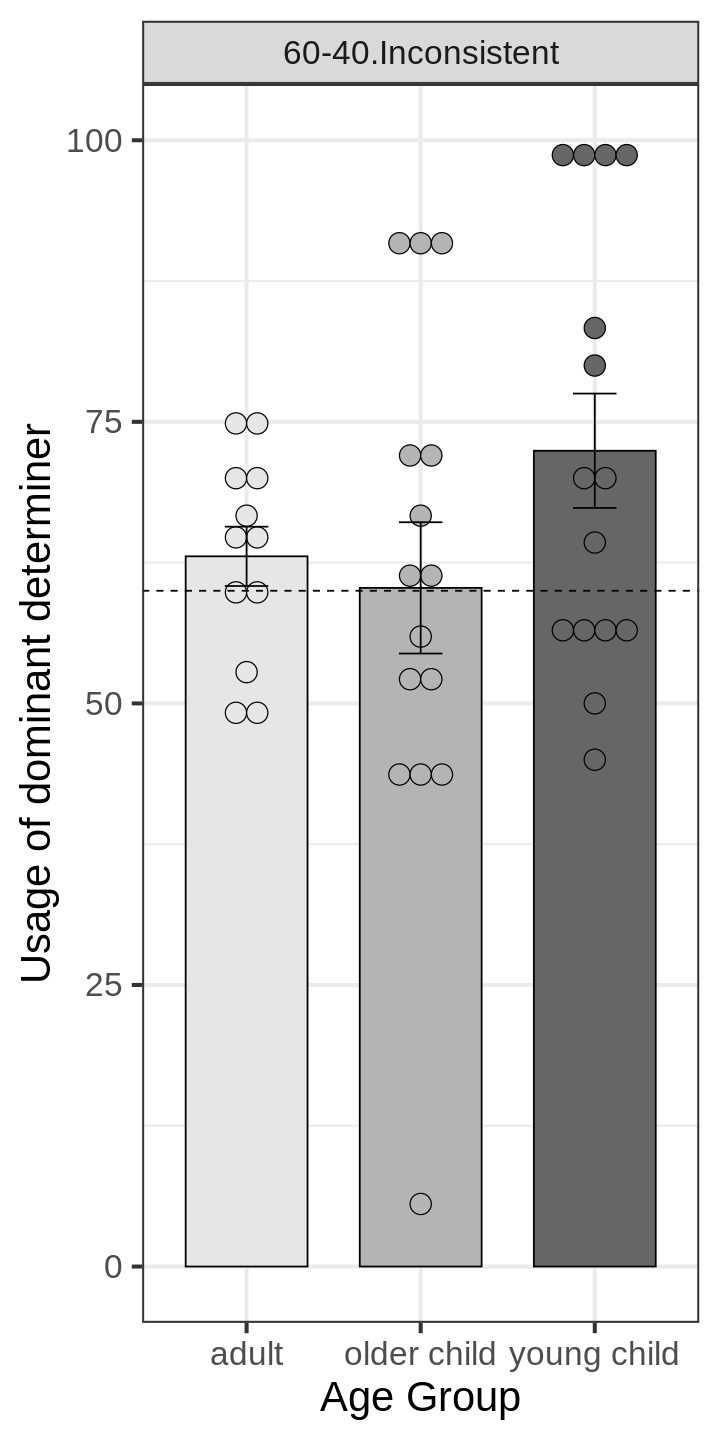

In [ ]:
options(repr.plot.width =6, repr.plot.height =12)

# plot mean usage across of the dominant determiner (mean across all days)
ggplot(filter(byDets, Experiment == "Experiment 2"), aes(ageLevel, usageDets, fill = ageLevel)) +
  facet_grid(.~Language)+
  coord_cartesian(ylim = c(0, 100)) +
  stat_summary(fun.y = mean, geom = "bar", width = 0.7, color = "black") +
  geom_dotplot(binaxis='y', stackdir='center', dotsize = 0.6, color = "black", position = position_dodge()) +
  stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.25, position = position_dodge(0.9)) +  
  geom_hline(aes(yintercept=60), linetype="dashed", color = "black") +
  scale_fill_grey(start = 0.9, end = 0.4) +
  labs(x = "Age Group", y = "Usage of dominant determiner") +
  theme(legend.position = "None")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



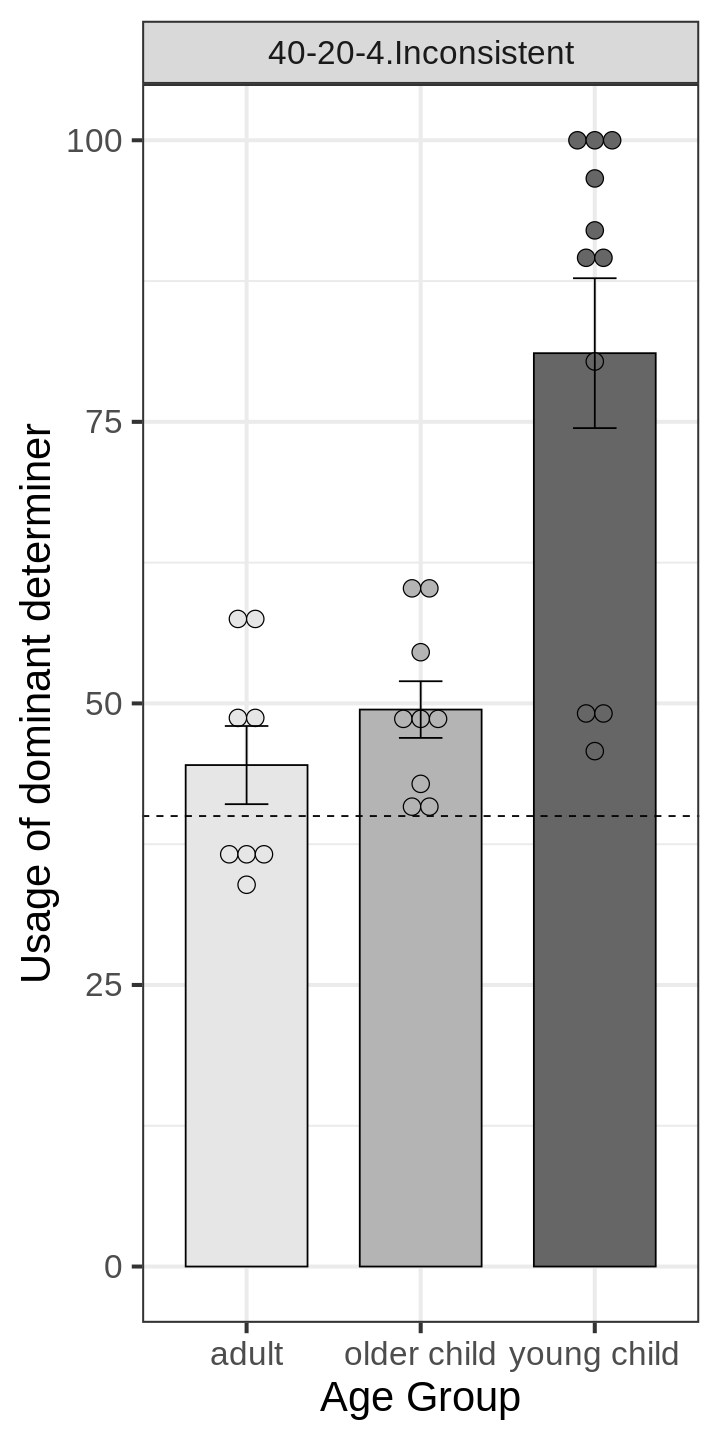

In [ ]:
options(repr.plot.width =6, repr.plot.height =12)

# plot mean usage across of the dominant determiner (mean across all days)
ggplot(filter(byDets, Experiment == "Experiment 3"), aes(ageLevel, usageDets, fill = ageLevel)) +
  facet_grid(.~Language)+
  coord_cartesian(ylim = c(0, 100)) +
  stat_summary(fun.y = mean, geom = "bar", width = 0.7, color = "black") +
  geom_dotplot(binaxis='y', stackdir='center', dotsize = 0.7, color = "black", position = position_dodge()) +
  stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.25, position = position_dodge(0.9)) +  
  geom_hline(aes(yintercept=40), linetype="dashed", color = "black") +
  scale_fill_grey(start = 0.9, end = 0.4) +
  labs(x = "Age Group", y = "Usage of dominant determiner") +
  theme(legend.position = "None")

### T-tests

In [ ]:
# do a one sample ttest against the input for Experiment 1 (by Language) (input = 67)
byDets %>% filter(Experiment == "Experiment 2") %>%
  group_by(Language, ageLevel) %>%
  do(tidy(t.test(x=.$usageDets, mu=60,  data=.))) %>%
  kable



|Language           |ageLevel    | estimate| statistic|   p.value| parameter| conf.low| conf.high|method            |alternative |
|:------------------|:-----------|--------:|---------:|---------:|---------:|--------:|---------:|:-----------------|:-----------|
|60-40.Inconsistent |adult       | 63.05868| 1.1613918| 0.2700645|        11| 57.26209|  68.85528|One Sample t-test |two.sided   |
|60-40.Inconsistent |older child | 60.25646| 0.0440043| 0.9655224|        14| 47.75657|  72.75635|One Sample t-test |two.sided   |
|60-40.Inconsistent |young child | 72.43341| 2.4488410| 0.0281064|        14| 61.54376|  83.32306|One Sample t-test |two.sided   |

In [ ]:
# do a one sample ttest against the input for Experiment 1 (by Language) (input = 67)
byDets %>% filter(Experiment == "Experiment 3") %>%
  group_by(Language, ageLevel) %>%
  do(tidy(t.test(x=.$usageDets, mu=40,  data=.))) %>%
  kable



|Language             |ageLevel    | estimate| statistic|   p.value| parameter| conf.low| conf.high|method            |alternative |
|:--------------------|:-----------|--------:|---------:|---------:|---------:|--------:|---------:|:-----------------|:-----------|
|40-20-4.Inconsistent |adult       | 44.52489|  1.304392| 0.2333477|         7| 36.32209|  52.72769|One Sample t-test |two.sided   |
|40-20-4.Inconsistent |older child | 49.45458|  3.758528| 0.0055560|         8| 43.65382|  55.25533|One Sample t-test |two.sided   |
|40-20-4.Inconsistent |young child | 81.09765|  6.175893| 0.0001047|        10| 66.27044|  95.92486|One Sample t-test |two.sided   |

## Use of Correct Det 
Relevant to Experiment 1 LexCon 

In [ ]:
logistic_mixed_effects_exp1_lex <- glmer(isLexDominantDet ~ age.group*noun.type*centered.day+ (1|Subject), 
                                family = "binomial", data = filter(model_data_exp1, Language == "67-33.LexicallyConsistent"),
                                control=glmerControl(optimizer="bobyqa"))
summary(logistic_mixed_effects_exp1_lex)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: isLexDominantDet ~ age.group * noun.type * centered.day + (1 |  
    Subject)
   Data: filter(model_data_exp1, Language == "67-33.LexicallyConsistent")
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
   577.7    621.6   -279.9    559.7      962 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.0453  0.1196  0.2041  0.3358  1.2360 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.16     1.077   
Number of obs: 971, groups:  Subject, 21

Fixed effects:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          1.8533     0.4667   3.971 7.16e-05 ***
age.group2                           0.1813     0.6217   0.292 0.770605    
noun.type2                           1.8794     0.4722   3.980 6.89e-05 ***
centered.day         

In [ ]:
# get mean % correct across all days for experiment 1 lex con language 
getCorr_Lex <- data %>%
  filter(Experiment == "Experiment 1", Language == "67-33.LexicallyConsistent") %>%
  # change level names for age as requestd by reviewers
  mutate(ageLevel = factor(ageLevel, levels = c("adult", "young"), labels = c("adult", "young child"))) %>%
  group_by(ageLevel, Age, Subject, Day, isLastDay, isDomNoun) %>% 
  summarise(n = n(), isCorr = sum(isLexDominantDet), pcntCorr = isCorr/n*100) %>%
  mutate(NounType = ifelse(isDomNoun == TRUE, "dominant", "minority"))



`summarise()` regrouping output by 'ageLevel', 'Age', 'Subject', 'Day', 'isLastDay' (override with `.groups` argument)



In [ ]:
getCorr_Lex %>%
  filter(isLastDay == TRUE) %>%
  group_by(ageLevel, isDomNoun) %>%
  summarise(n = n(), mean = mean(pcntCorr), sd = sd(pcntCorr), se = sd/sqrt(n)) %>%
  kable

`summarise()` regrouping output by 'ageLevel' (override with `.groups` argument)





|ageLevel    |isDomNoun |  n|     mean|        sd|       se|
|:-----------|:---------|--:|--------:|---------:|--------:|
|adult       |FALSE     |  8| 92.85714| 15.272071| 5.399493|
|adult       |TRUE      |  8| 98.21429|  5.050763| 1.785714|
|young child |FALSE     | 12| 80.59524| 22.175185| 6.401424|
|young child |TRUE      | 11| 86.26374| 29.705921| 8.956672|

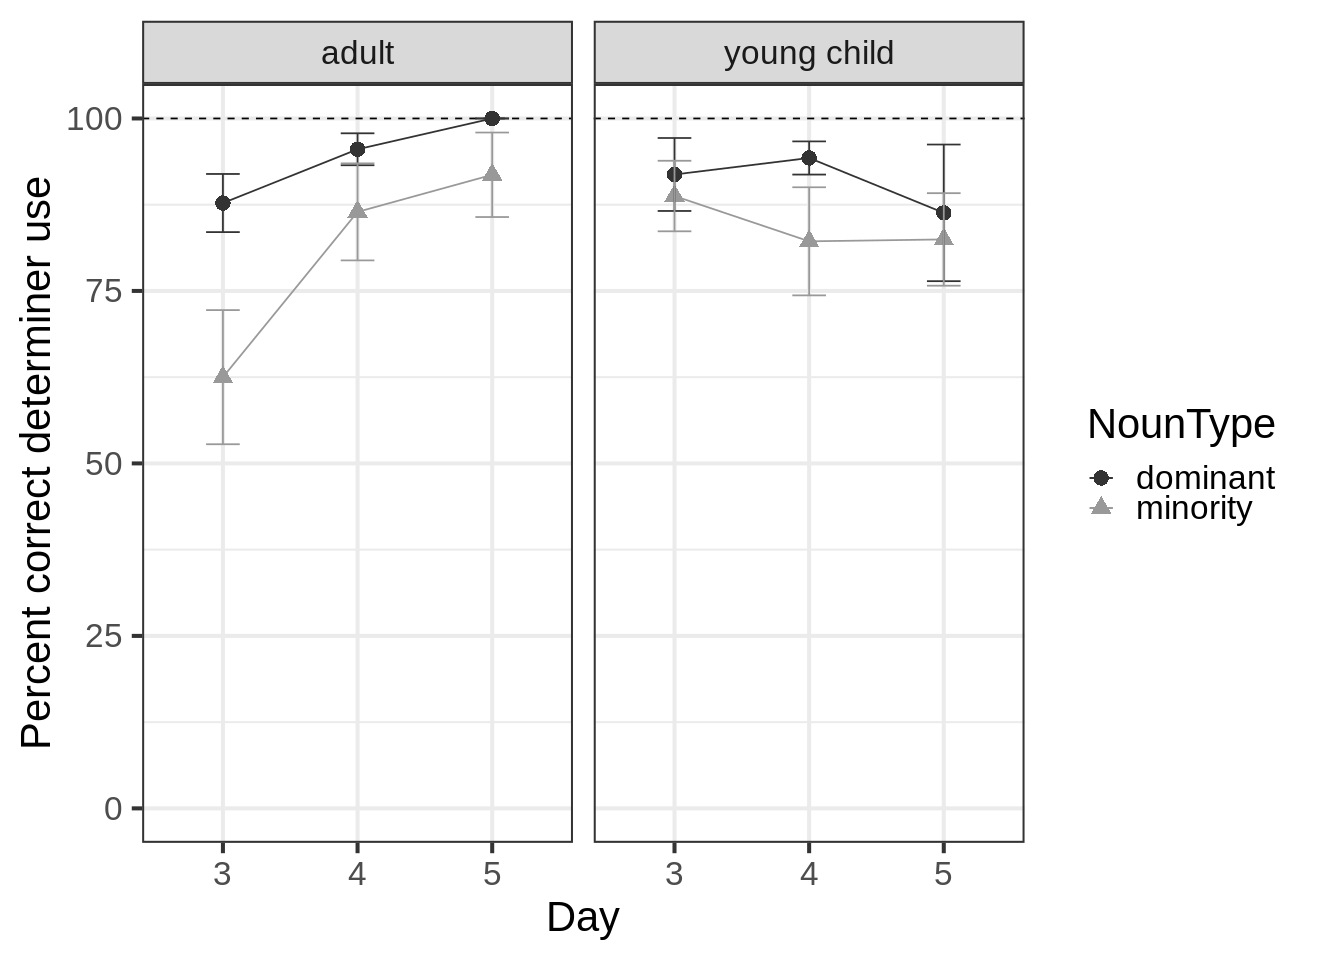

In [ ]:
options(repr.plot.width =11, repr.plot.height =8)

ggplot(getCorr_Lex, aes(as.factor(Day), pcntCorr, color = NounType, shape = NounType)) +
  facet_grid(.~ageLevel)+
  geom_hline(yintercept=100, linetype="dashed", color = "black") +
  coord_cartesian(ylim = c(0, 100)) +
  stat_summary(aes(group = NounType), fun = mean, geom = "line") +
  stat_summary(fun = mean, geom = "point", size = 4) +
  stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.25) +  
  scale_color_grey(start = 0.2, end = 0.6) +
  labs(x = "Day", y = "Percent correct determiner use") 

## Rules

In [ ]:
# rule codes
dom = c(41.3, 1, 1.6, 1.3)
min = c(2, 2.3)
by_noun = c(3.3, 3)
by_gram = c(45)


In [ ]:
rule_analysis <- data %>% 
  mutate(SubDay = paste(Subject, Day, sep="-")) %>%
  mutate(Rule = ifelse(SubDay %in% c("A5-5", "A6-3", "C4-4"), 0.0, ifelse(SubDay %in% c("A9-3", "C10-3", "36-3"), 3.3, ifelse(SubDay %in% c("C33-5", "C39-3"), 1, Rule)))) %>%
  group_by(Experiment, Language, ageLevel, Subject, Day, isLastDay) %>%
  summarise(useRule = min(isRule), whichRule = list(unique(Rule))) %>%
  mutate(fullRule = ifelse(whichRule %in% c(dom, min, by_noun, by_gram), 1, 0)) %>%
  mutate(ruleName = ifelse(whichRule %in% dom, "Regularized Dominant",
                    ifelse(whichRule %in% min, "Regularized Minority",
                    ifelse(whichRule %in% by_noun, "Conditioned on Noun",
                    ifelse(whichRule %in% by_gram , "Conditioned on Grammatical Role",
                    "No Rule")))))
  
rule_analysis %>%  head %>%
  kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel', 'Subject', 'Day' (override with `.groups` argument)





|Experiment   |Language           |ageLevel |Subject | Day|isLastDay | useRule|whichRule | fullRule|ruleName |
|:------------|:------------------|:--------|:-------|---:|:---------|-------:|:---------|--------:|:--------|
|Experiment 1 |67-33.Inconsistent |adult    |A18     |   3|FALSE     |       1|1.4       |        0|No Rule  |
|Experiment 1 |67-33.Inconsistent |adult    |A18     |   4|FALSE     |       0|0         |        0|No Rule  |
|Experiment 1 |67-33.Inconsistent |adult    |A18     |   5|TRUE      |       1|1.45      |        0|No Rule  |
|Experiment 1 |67-33.Inconsistent |adult    |A19     |   3|FALSE     |       1|1.5       |        0|No Rule  |
|Experiment 1 |67-33.Inconsistent |adult    |A19     |   4|TRUE      |       1|1.45      |        0|No Rule  |
|Experiment 1 |67-33.Inconsistent |adult    |A21     |   3|FALSE     |       0|0         |        0|No Rule  |

In [ ]:
data %>% head() %>% kable



| X1|Experiment   |Language                  |ageLevel |Dominant.Det |Subject |      Age| Day|isLastDay |Experimenter | Position|Gram |Noun |Det |recodedDet2 |isDominantDet |isMinorityDet |isDomNoun |isLexDominantDet | Rule| Vocab.Score| isRule|
|--:|:------------|:-------------------------|:--------|:------------|:-------|--------:|---:|:---------|:------------|--------:|:----|:----|:---|:-----------|:-------------|:-------------|:---------|:----------------|----:|-----------:|------:|
|  1|Experiment 1 |67-33.LexicallyConsistent |adult    |ka           |A11     | 20.04107|   3|FALSE     |Alison       |        1|s    |m    |ka  |Dominant    |TRUE          |FALSE         |TRUE      |TRUE             |    3|           6|      1|
|  2|Experiment 1 |67-33.LexicallyConsistent |adult    |ka           |A11     | 20.04107|   3|FALSE     |Alison       |        1|s    |f    |ka  |Dominant    |TRUE          |FALSE         |FALSE     |FALSE            |    3|           6|      1|
|  3|Experimen

In [ ]:
# a second rules analysis that uses conditional entropy to tag rule
rule_analysis_2 <- data %>%
  group_by(Experiment, Language, ageLevel, Subject, Day, isLastDay) %>%
  summarise(rule_reg = entropy(recodedDet2),
            rule_lex = condentropy(recodedDet2, Noun),
            rule_gram = condentropy(recodedDet2, Gram),
            min_ent = min(rule_reg, rule_lex, rule_gram)) %>%
  mutate(best_rule = ifelse(min_ent == rule_reg, "Regularizer", ifelse(min_ent == rule_gram, "Grammatical Role", "Noun")),
          reg_index = 1-min_ent)


write.csv(rule_analysis_2, 'identify_rules_with_entropy.csv')

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel', 'Subject', 'Day' (override with `.groups` argument)



In [ ]:
rule_analysis_2 %>% head() %>% kable



|Experiment   |Language           |ageLevel |Subject | Day|isLastDay |  rule_reg|  rule_lex| rule_gram|   min_ent|best_rule        | reg_index|
|:------------|:------------------|:--------|:-------|---:|:---------|---------:|---------:|---------:|---------:|:----------------|---------:|
|Experiment 1 |67-33.Inconsistent |adult    |A18     |   3|FALSE     | 0.4101163| 0.2354169| 0.2727918| 0.2354169|Noun             | 0.7645831|
|Experiment 1 |67-33.Inconsistent |adult    |A18     |   4|FALSE     | 0.6881388| 0.3988984| 0.6805136| 0.3988984|Noun             | 0.6011016|
|Experiment 1 |67-33.Inconsistent |adult    |A18     |   5|TRUE      | 0.5004024| 0.3465736| 0.2772589| 0.2772589|Grammatical Role | 0.7227411|
|Experiment 1 |67-33.Inconsistent |adult    |A19     |   3|FALSE     | 0.6108643| 0.4158883| 0.2249341| 0.2249341|Grammatical Role | 0.7750659|
|Experiment 1 |67-33.Inconsistent |adult    |A19     |   4|TRUE      | 0.5004024| 0.3034213| 0.3635635| 0.3034213|Noun             | 0

In [ ]:
install.packages('ggbeeswarm')
library(ggbeeswarm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’




`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing missing values (geom_hline).”


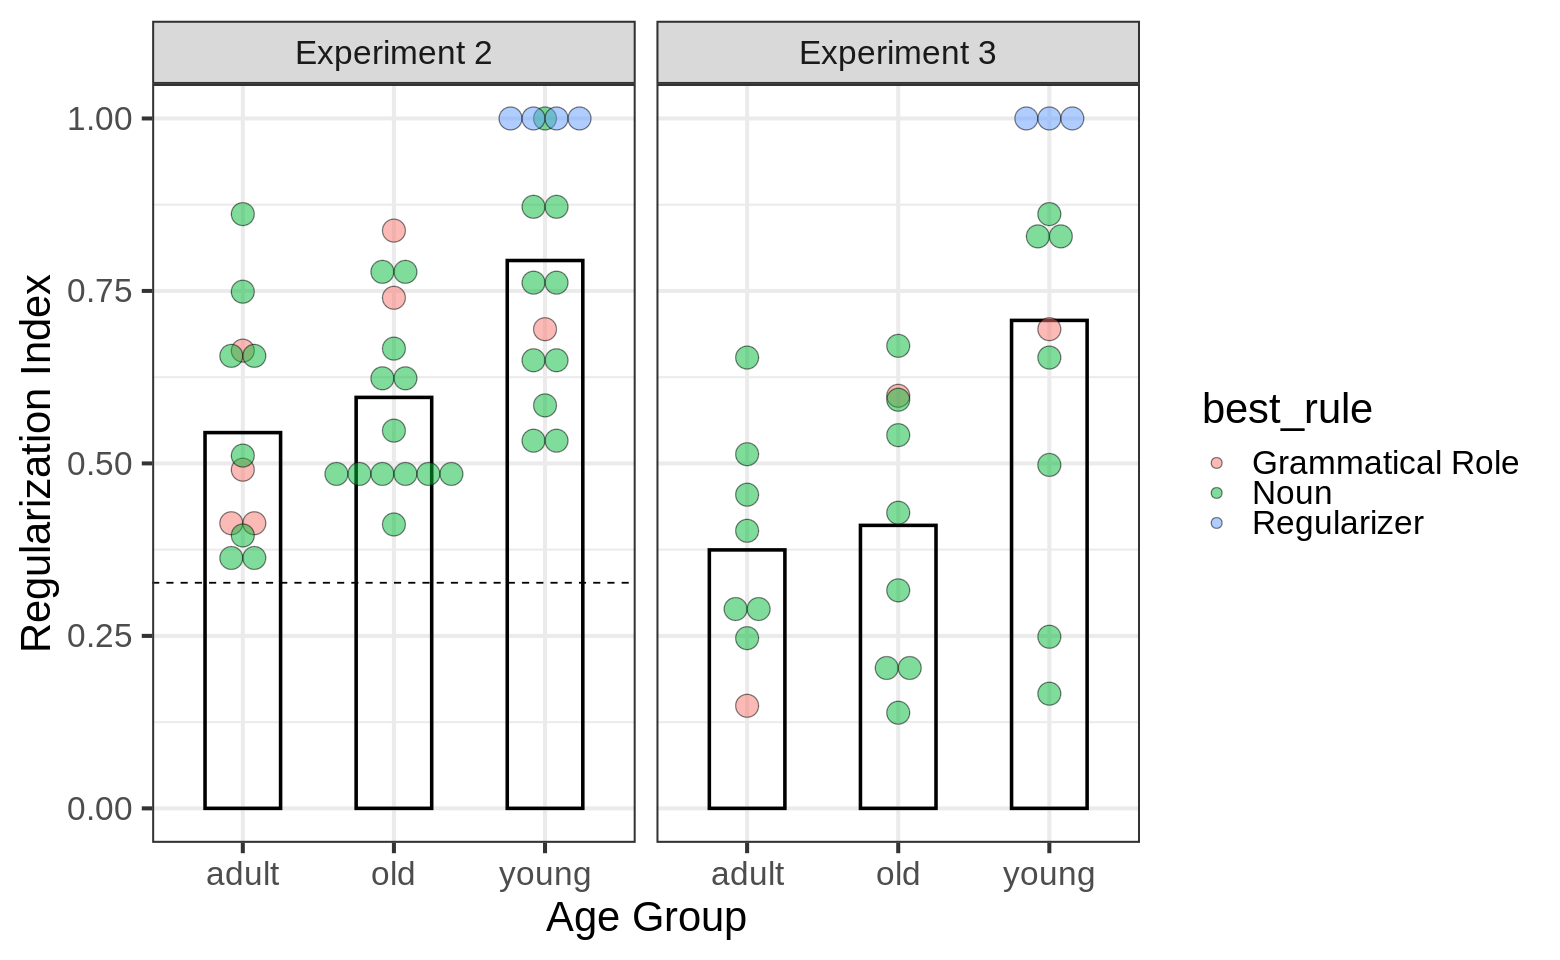

In [ ]:
options(repr.plot.width =13, repr.plot.height =8)

inputs = data.frame(Experiment = c("Experiment 1", "Experiment 2", "Experiment 3"),
                    input = c((1-sixtyseven), (1-sixty), (1-forty)))

ggplot(filter(rule_analysis_2, Experiment %in% c("Experiment 2", "Experiment 3"), isLastDay == TRUE), aes(ageLevel, reg_index, fill = best_rule)) +
  facet_grid(.~Experiment) +
  stat_summary(fun = mean, geom = "bar", size = 1, fill = NA, color = "black", width = 0.5) +
  geom_dotplot(stackdir = "center", binaxis = "y", alpha = 0.5)+
  labs(x = "Age Group", y = "Regularization Index", legend = "Rule") +
  geom_hline(data = filter(inputs, Experiment != "Experiment 1"), aes(yintercept = input), linetype = "dashed") +
  ylim(0, 1.0)

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



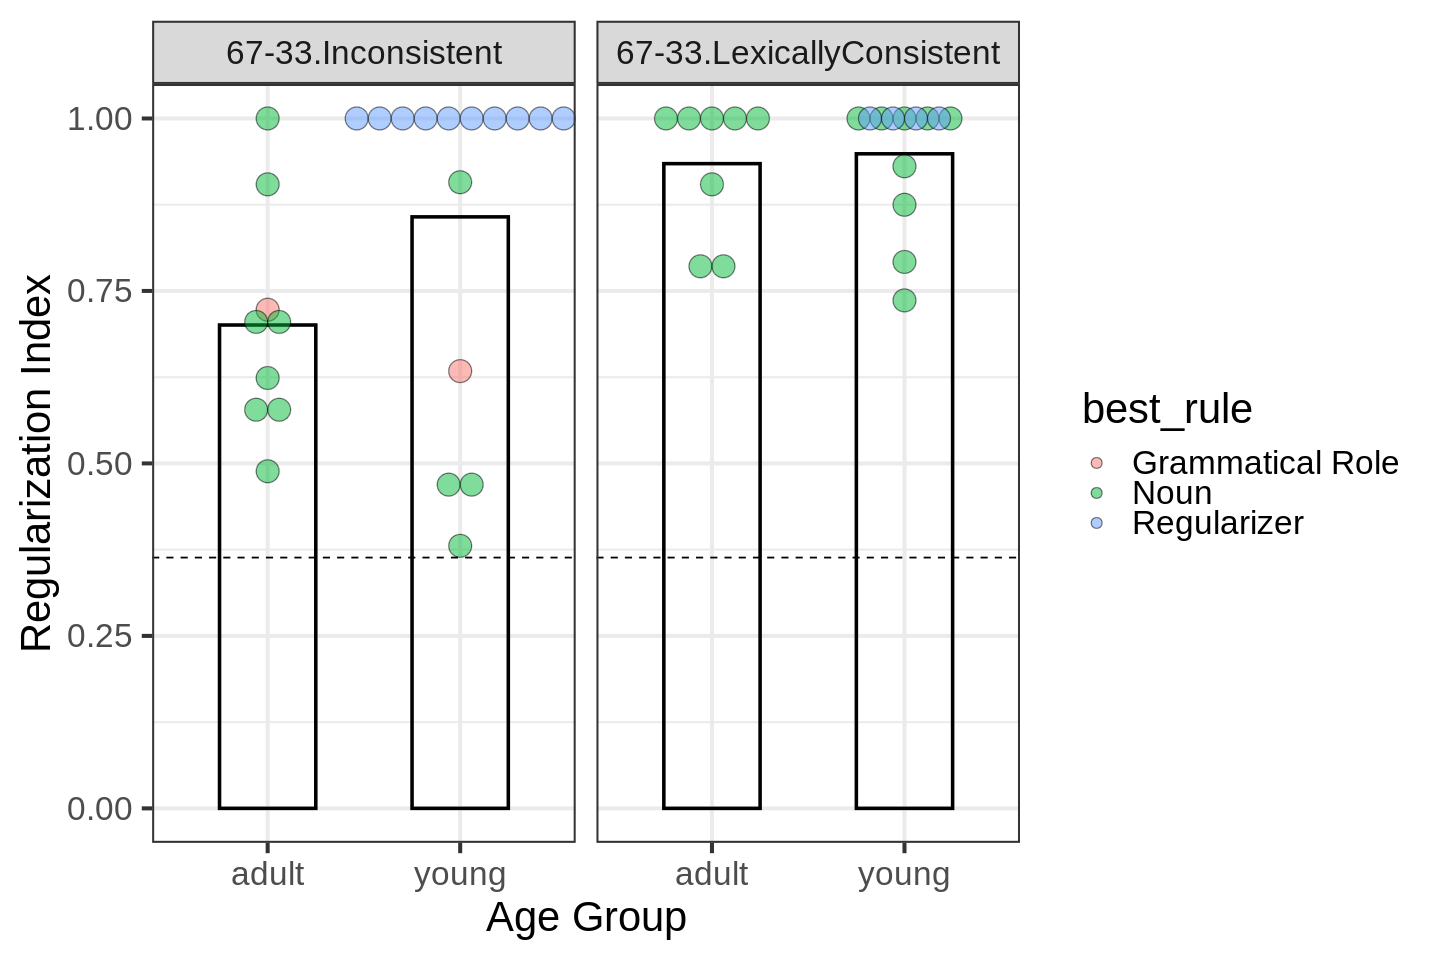

In [ ]:
options(repr.plot.width =12, repr.plot.height =8)

ggplot(filter(rule_analysis_2, Experiment %in% c("Experiment 1"), isLastDay == TRUE), aes(ageLevel, reg_index, fill = best_rule)) +
  facet_grid(.~Language) +
  stat_summary(fun = mean, geom = "bar", size = 1, fill = NA, color = "black", width = 0.5) +
  geom_dotplot(stackdir = "center", binaxis = "y", alpha = 0.5)+
  labs(x = "Age Group", y = "Regularization Index", legend = "Rule") +
  geom_hline(data = filter(inputs, Experiment == "Experiment 1"), aes(yintercept = input), linetype = "dashed") +
  ylim(0, 1.0)

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



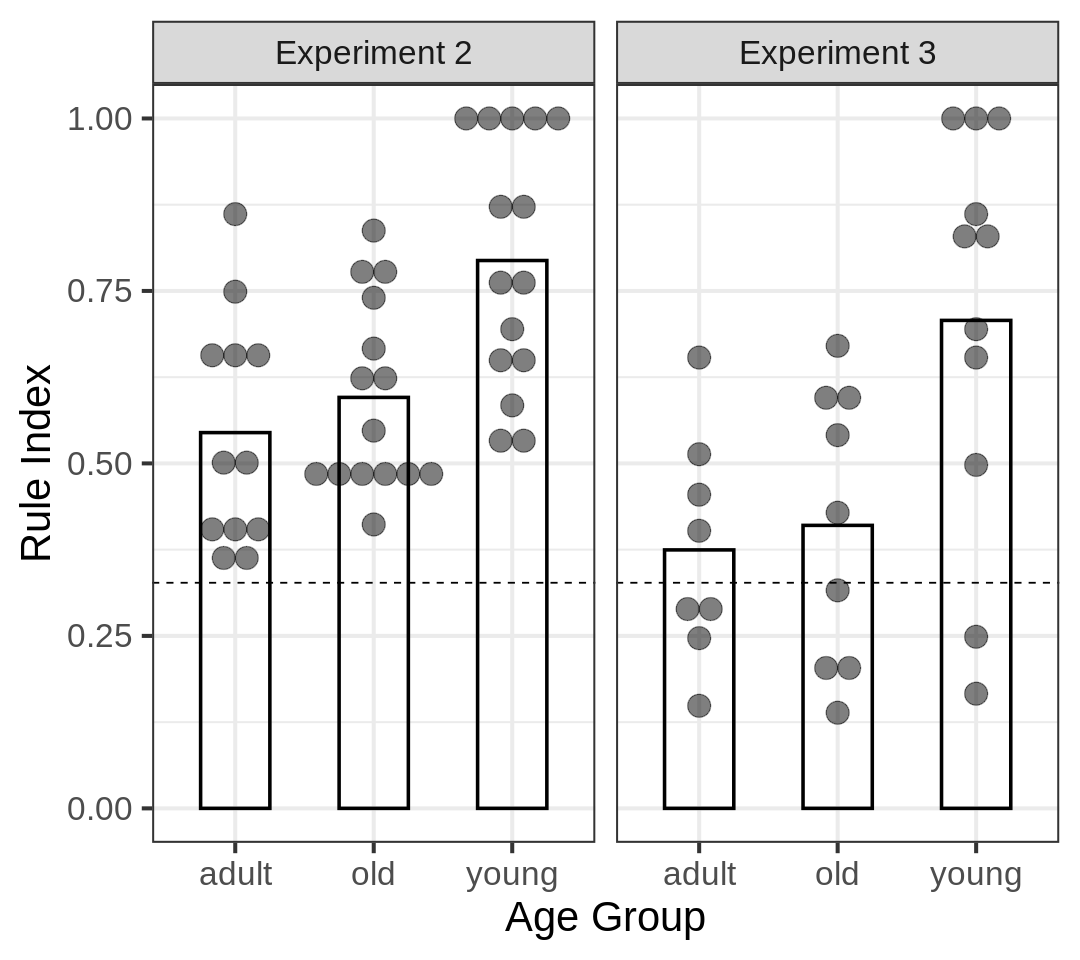

In [ ]:
options(repr.plot.width = 9, repr.plot.height =8)


ggplot(filter(rule_analysis_2, Experiment %in% c("Experiment 2", "Experiment 3"), isLastDay == TRUE), aes(ageLevel, reg_index)) +
  facet_grid(.~Experiment) +
  stat_summary(fun = mean, geom = "bar", size = 1, fill = NA, color = "black", width = 0.5) +
  geom_dotplot(stackdir = "center", binaxis = "y", alpha = 0.5)+
  labs(x = "Age Group", y = "Rule Index", legend = "Rule") +
  geom_hline(yintercept = 1 - sixty, linetype = "dashed") +
  ylim(0, 1.0)

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



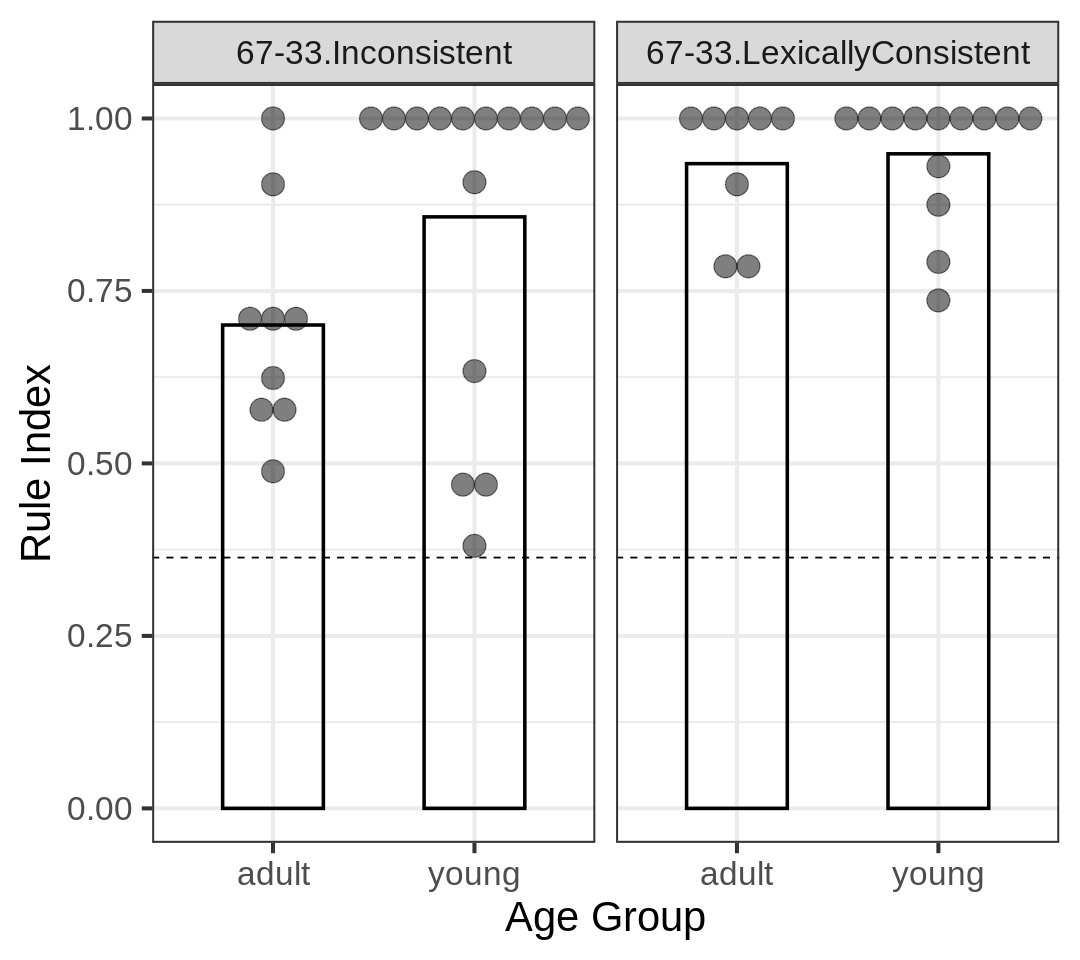

In [ ]:
options(repr.plot.width = 9, repr.plot.height =8)


ggplot(filter(rule_analysis_2, Experiment %in% c("Experiment 1"), isLastDay == TRUE), aes(ageLevel, reg_index)) +
  facet_grid(.~Language) +
  stat_summary(fun = mean, geom = "bar", size = 1, fill = NA, color = "black", width = 0.5) +
  geom_dotplot(stackdir = "center", binaxis = "y", alpha = 0.5)+
  labs(x = "Age Group", y = "Rule Index", legend = "Rule") +
  geom_hline(yintercept = 1 - sixtyseven, linetype = "dashed") +
  ylim(0, 1.0)

### Count

In [ ]:
rule_analysis %>% group_by(Experiment, Language, ageLevel, isLastDay, ruleName) %>%
  summarise(n = n()) %>% kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel', 'isLastDay' (override with `.groups` argument)





|Experiment   |Language                  |ageLevel |isLastDay |ruleName                        |  n|
|:------------|:-------------------------|:--------|:---------|:-------------------------------|--:|
|Experiment 1 |67-33.Inconsistent        |adult    |FALSE     |Conditioned on Noun             |  3|
|Experiment 1 |67-33.Inconsistent        |adult    |FALSE     |No Rule                         | 13|
|Experiment 1 |67-33.Inconsistent        |adult    |TRUE      |Conditioned on Noun             |  2|
|Experiment 1 |67-33.Inconsistent        |adult    |TRUE      |No Rule                         |  7|
|Experiment 1 |67-33.Inconsistent        |young    |FALSE     |Conditioned on Noun             |  1|
|Experiment 1 |67-33.Inconsistent        |young    |FALSE     |No Rule                         | 11|
|Experiment 1 |67-33.Inconsistent        |young    |FALSE     |Regularized Dominant            | 12|
|Experiment 1 |67-33.Inconsistent        |young    |TRUE      |No Rule                   

### GLM rules

In [ ]:
r_model_exp1 <- rule_analysis %>% 
  filter(Experiment == "Experiment 1", Language == "67-33.Inconsistent") %>%
  mutate(age.group = factor(ageLevel), 
  centered.day = ifelse(Day == 3, -1, ifelse(Day == 4, 0, 1)))

contrasts(r_model_exp1$age.group) <- contr.treatment(2)

rule_model_exp1 <- glmer(fullRule ~ age.group*centered.day + (1|Subject), data = r_model_exp1, family = "binomial", control=glmerControl(optimizer="bobyqa"))

In [ ]:
summary(rule_model_exp1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fullRule ~ age.group * centered.day + (1 | Subject)
   Data: r_model_exp1
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
    62.2     73.0    -26.1     52.2       59 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.40065 -0.00300 -0.00129  0.00190  1.42655 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 948.8    30.8    
Number of obs: 64, groups:  Subject, 24

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -11.60740    4.17622  -2.779  0.00545 ** 
age.group2               29.06871    5.73380   5.070 3.98e-07 ***
centered.day             -0.02777    1.24429  -0.022  0.98219    
age.group2:centered.day   8.21227    1.61561   5.083 3.71e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [ ]:
r_model_exp2 <- rule_analysis %>% 
  filter(Experiment == "Experiment 2", ageLevel != "adult") %>%
  mutate(age.group = factor(ageLevel), 
  centered.day = ifelse(Day == 3, -1, ifelse(Day == 4, 0, 1)))

contrasts(r_model_exp2$age.group) <- contr.treatment(2)


rule_model_exp2 <- glmer(fullRule ~ age.group*centered.day + (1|Subject), data = r_model_exp2, family = "binomial", control=glmerControl(optimizer="bobyqa"))

In [ ]:
summary(rule_model_exp2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fullRule ~ age.group * centered.day + (1 | Subject)
   Data: r_model_exp2
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
    78.8     90.9    -34.4     68.8       78 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96595 -0.02254 -0.00483  0.12750  2.43640 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 162.6    12.75   
Number of obs: 83, groups:  Subject, 30

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)   
(Intercept)              -10.575      3.300  -3.204  0.00135 **
age.group2                 3.167      2.884   1.098  0.27219   
centered.day              -3.133      1.814  -1.727  0.08419 . 
age.group2:centered.day    3.076      2.033   1.513  0.13033   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correl

In [ ]:
rule_model_exp2_simple <- glm(fullRule ~ age.group, data = filter(r_model_exp2, isLastDay == 1), family = "binomial")

In [ ]:
filter(r_model_exp2, isLastDay == 1) %>% kable



|Experiment   |Language           |ageLevel |Subject | Day|isLastDay | useRule|whichRule | fullRule|ruleName                        |age.group | centered.day|
|:------------|:------------------|:--------|:-------|---:|:---------|-------:|:---------|--------:|:-------------------------------|:---------|------------:|
|Experiment 2 |60-40.Inconsistent |old      |C167    |   5|TRUE      |       0|0         |        0|No Rule                         |old       |            1|
|Experiment 2 |60-40.Inconsistent |old      |C168    |   5|TRUE      |       0|0         |        0|No Rule                         |old       |            1|
|Experiment 2 |60-40.Inconsistent |old      |C169    |   5|TRUE      |       0|0         |        0|No Rule                         |old       |            1|
|Experiment 2 |60-40.Inconsistent |old      |C170    |   5|TRUE      |       0|0         |        0|No Rule                         |old       |            1|
|Experiment 2 |60-40.Inconsistent |old      

In [ ]:
r_model_exp3 <- rule_analysis %>% 
  filter(Experiment == "Experiment 3", isLastDay == 1) %>%
  mutate(age.group = factor(ageLevel), 
  centered.day = ifelse(Day == 3, -1, ifelse(Day == 4, 0, 1)))

contrasts(r_model_exp3$age.group) <- contr.treatment(3)


rule_model_exp3 <- glmer(fullRule ~ age.group*centered.day + (1|Subject), data = r_model_exp3, family = "binomial", control=glmerControl(optimizer="bobyqa"))

fixed-effect model matrix is rank deficient so dropping 2 columns / coefficients

boundary (singular) fit: see ?isSingular



In [ ]:
summary(rule_model_exp3)

Warning message in vcov.merMod(object, use.hessian = use.hessian):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”
Warning message in vcov.merMod(object, correlation = correlation, sigm = sig):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: fullRule ~ age.group * centered.day + (1 | Subject)
   Data: r_model_exp3
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
    23.5     30.1     -6.7     13.5       23 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-0.81650 -0.00002 -0.00001 -0.00001  1.22474 

Random effects:
 Groups  Name        Variance  Std.Dev. 
 Subject (Intercept) 6.807e-10 2.609e-05
Number of obs: 28, groups:  Subject, 28

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)    -43.377  47746.861  -0.001    0.999
age.group2      -1.351  68401.632   0.000    1.000
age.group3      22.451  32488.553   0.001    0.999
centered.day    20.520  34989.380   0.001    1.000

Correlation of Fixed Effects:
            (Intr) ag.gr2 ag.gr3
age.group2  -0.323              
age.group3  -0.680  0.475       
cente

### Figures

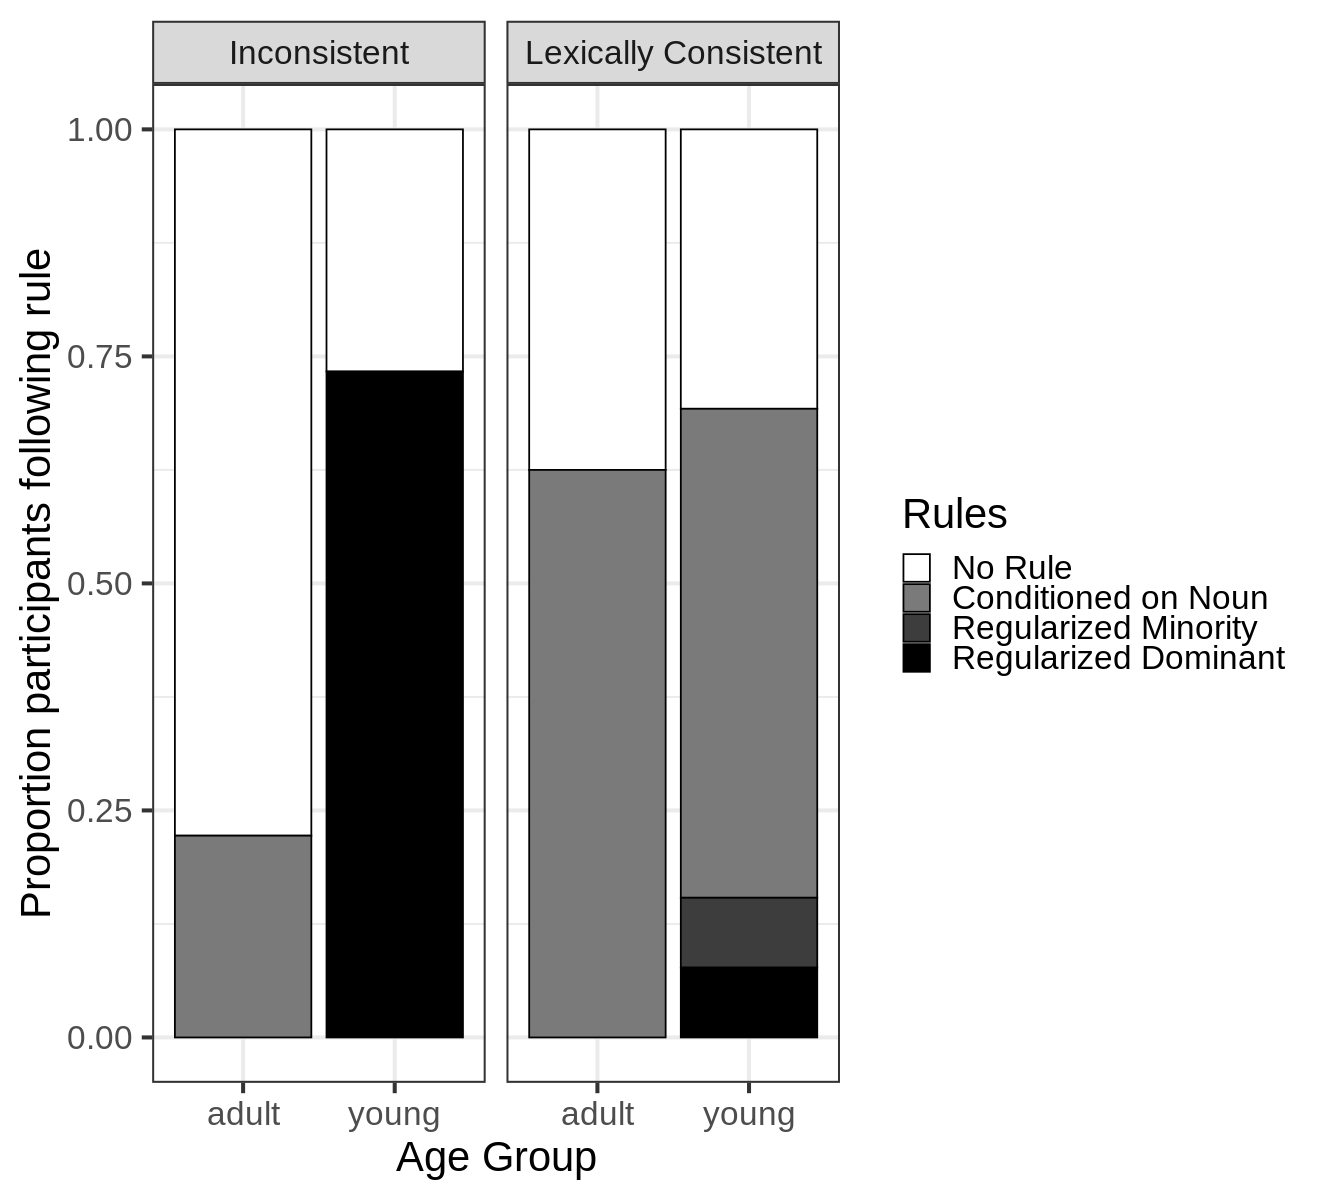

In [ ]:
options(repr.plot.width =11, repr.plot.height =10)
rule_anal_plot <- filter(rule_analysis,isLastDay == TRUE, Experiment %in% c("Experiment 1")) %>% 
  mutate(ruleName = factor(ruleName, levels = c("No Rule", "Conditioned on Grammatical Role", "Conditioned on Noun", "Regularized Minority", "Regularized Dominant")),
      Language = recode(Language, `67-33.Inconsistent`="Inconsistent", `67-33.LexicallyConsistent`="Lexically Consistent"))


ggplot(rule_anal_plot, aes(x = ageLevel, fill = ruleName)) + facet_grid(.~Language) + 
  geom_bar(position = "fill", color = "black") + labs(y = "Proportion participants following rule") +
  scale_fill_manual(values = c("white", "grey48", "gray24", "black")) +labs(fill = "Rules", x = "Age Group")

## Omitted Determiners



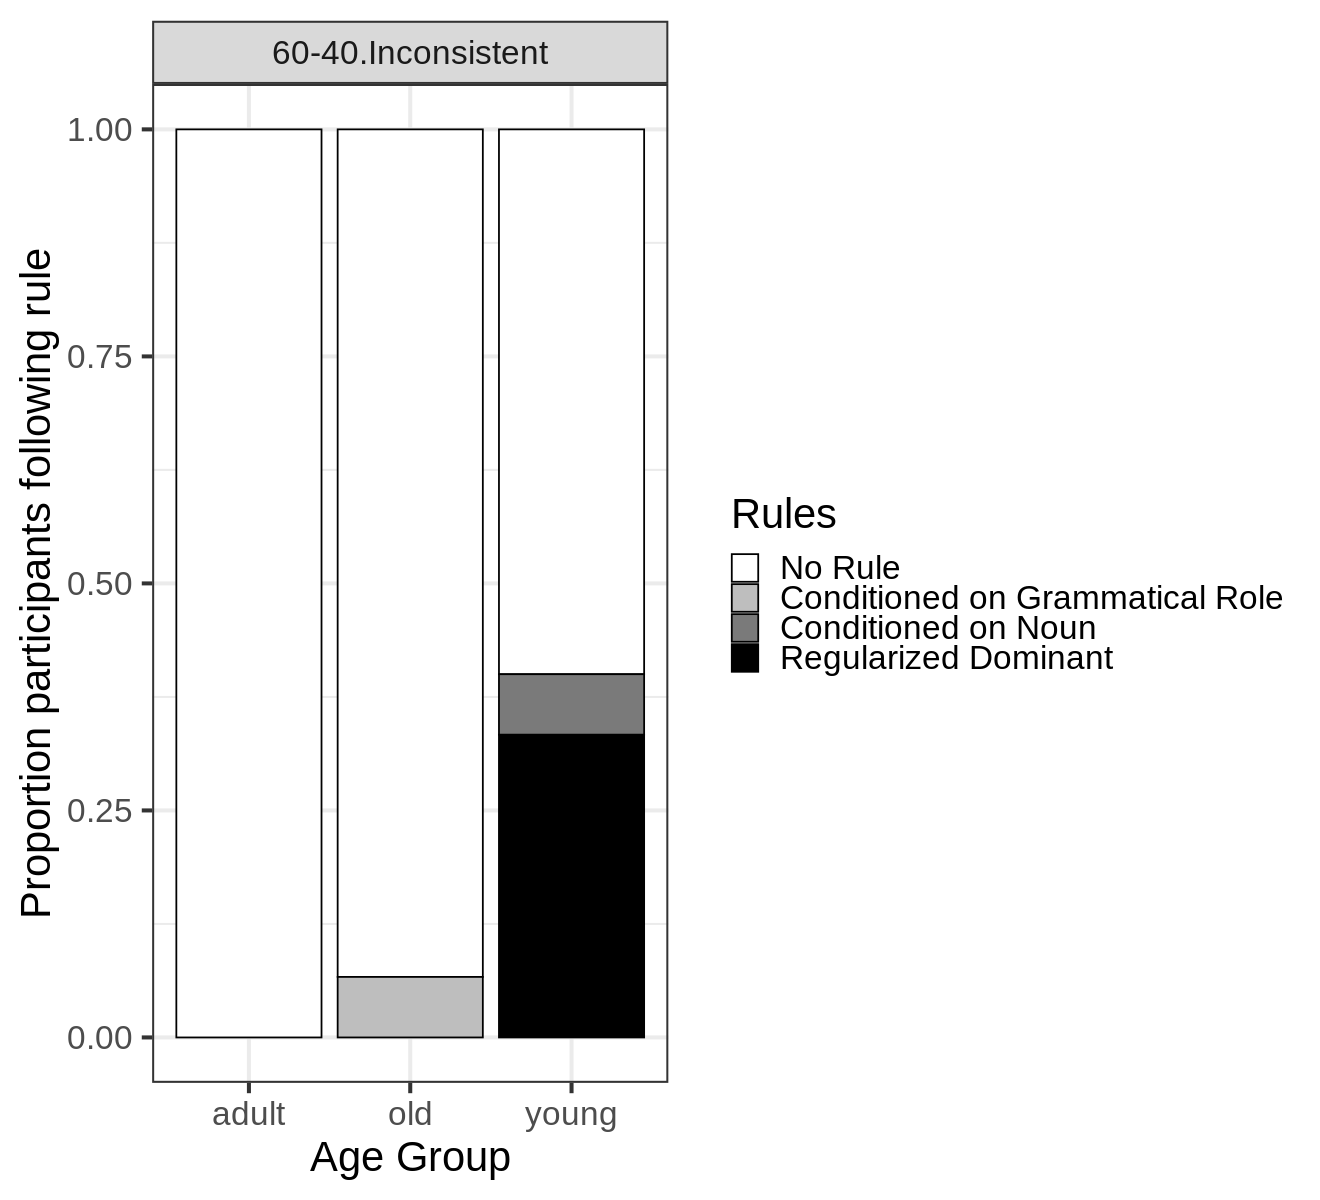

In [ ]:
options(repr.plot.width =11, repr.plot.height =10)
rule_anal_plot <- filter(rule_analysis,isLastDay == TRUE, Experiment %in% c("Experiment 2")) %>% 
  mutate(ruleName = factor(ruleName, levels = c("No Rule", "Conditioned on Grammatical Role", "Conditioned on Noun", "Regularized Minority", "Regularized Dominant")),
      Language = recode(Language, `67-33.Inconsistent`="Inconsistent", `67-33.LexicallyConsistent`="Lexically Consistent"))


ggplot(rule_anal_plot, aes(x = ageLevel, fill = ruleName)) + facet_grid(.~Language) + 
  geom_bar(position = "fill", color = "black") + labs(y = "Proportion participants following rule") +
  scale_fill_manual(values = c("white", "grey", "gray48", "black")) +labs(fill = "Rules", x = "Age Group")

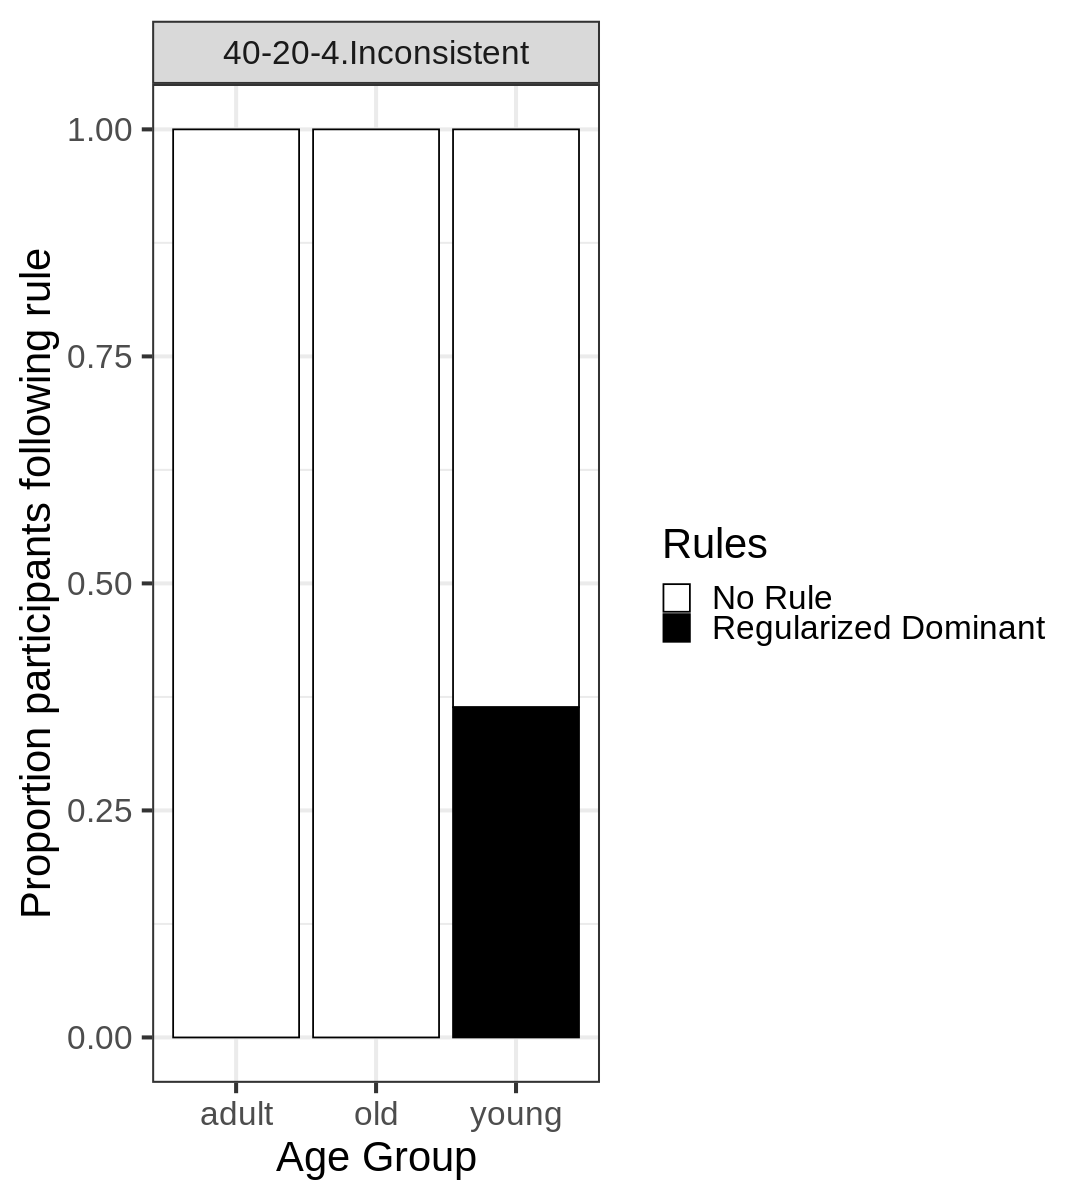

In [ ]:
options(repr.plot.width =9, repr.plot.height =10)
rule_anal_plot <- filter(rule_analysis,isLastDay == TRUE, Experiment %in% c("Experiment 3")) %>% 
  mutate(ruleName = factor(ruleName, levels = c("No Rule", "Conditioned on Grammatical Role", "Conditioned on Noun", "Regularized Minority", "Regularized Dominant")),
      Language = recode(Language, `67-33.Inconsistent`="Inconsistent", `67-33.LexicallyConsistent`="Lexically Consistent"))


ggplot(rule_anal_plot, aes(x = ageLevel, fill = ruleName)) + facet_grid(.~Language) + 
  geom_bar(position = "fill", color = "black") + labs(y = "Proportion participants following rule") +
  scale_fill_manual(values = c("white", "black")) +labs(fill = "Rules", x = "Age Group")

### Setup entropy & mi


In [ ]:
1-forty

[1] -0.9991638

In [ ]:
condentropy_byday %>% 
  group_by(Experiment, Language, ageLevel, Subject) %>%
  summarise(meanEnt = mean(entropy), meanMI = mean(MI), meanChangeEnt = mean(changeEnt)) %>%
  group_by(Experiment, Language, ageLevel) %>%
  summarise(n=n(), GroupMeanEnt = mean(meanEnt), GroupMeanMI = mean(meanMI), GroupMeanChange = mean(meanChangeEnt)) %>% kable

`summarise()` regrouping output by 'Experiment', 'Language', 'ageLevel' (override with `.groups` argument)

`summarise()` regrouping output by 'Experiment', 'Language' (override with `.groups` argument)





|Experiment   |Language                  |ageLevel |  n| GroupMeanEnt| GroupMeanMI| GroupMeanChange|
|:------------|:-------------------------|:--------|--:|------------:|-----------:|---------------:|
|Experiment 1 |67-33.Inconsistent        |adult    |  9|    0.5936056|   0.2779024|      -0.0429085|
|Experiment 1 |67-33.Inconsistent        |young    | 15|    0.2417181|   0.0994123|      -0.3947960|
|Experiment 1 |67-33.LexicallyConsistent |adult    |  8|    0.5987190|   0.4646861|      -0.0752810|
|Experiment 1 |67-33.LexicallyConsistent |young    | 13|    0.4114308|   0.3577530|      -0.2625692|
|Experiment 2 |60-40.Inconsistent        |adult    | 12|    0.6035665|   0.1350262|      -0.0694451|
|Experiment 2 |60-40.Inconsistent        |old      | 15|    0.5262121|   0.1402278|      -0.1467996|
|Experiment 2 |60-40.Inconsistent        |young    | 14|    0.4214958|   0.1604183|      -0.2515159|
|Experiment 3 |40-20-4.Inconsistent      |adult    |  8|    0.9568920|   0.2859953|      

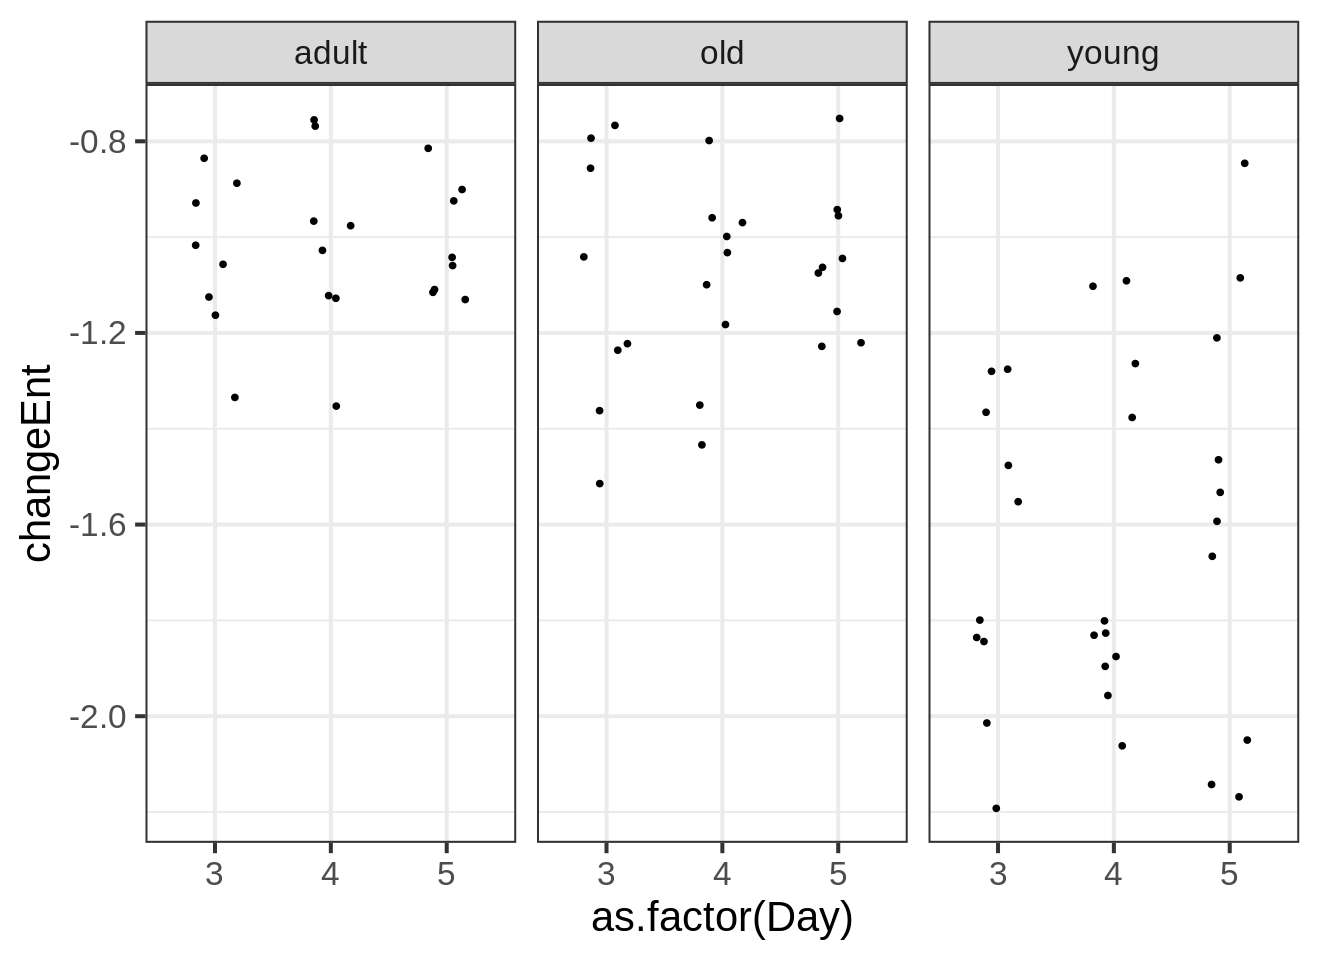

In [ ]:
options(repr.plot.width =11, repr.plot.height =8)

ggplot(filter(condentropy_byday, Experiment == "Experiment 3"), aes(x=as.factor(Day), y=changeEnt), color = ageLevel) +
  facet_grid(.~ageLevel) +
  geom_jitter(width = 0.2, height = 0.2)

In [ ]:
model_data_exp1_infotheo <- condentropy_byday %>% filter(Experiment == "Experiment 1", Language == "67-33.Inconsistent") %>% 
  mutate(age.group = factor(ageLevel), centered.day = ifelse(Day == 3, -1, ifelse(Day==4, 0, 1))) 

contrasts(model_data_exp1_infotheo$age.group) <- mysimple2


In [ ]:
model_data_exp2_infotheo <- condentropy_byday %>% filter(Experiment == "Experiment 2") %>% 
  mutate(age.group = factor(ageLevel), centered.day = ifelse(Day == 3, -1, ifelse(Day==4, 0, 1))) 

contrasts(model_data_exp2_infotheo$age.group) <- mysimple3


In [ ]:
model_data_exp3_infotheo <- condentropy_byday %>% filter(Experiment == "Experiment 3") %>% 
  mutate(age.group = factor(ageLevel), centered.day = ifelse(Day == 3, -1, ifelse(Day==4, 0, 1))) 

contrasts(model_data_exp3_infotheo$age.group) <- mysimple3


### Entropy

In [ ]:
lme_exp1_entropy.max <- lmer(entropy ~ age.group*centered.day + (1|Subject), data = model_data_exp1_infotheo)

lme_exp1_entropy.int <- lmer(entropy ~ age.group+centered.day + (1|Subject), data = model_data_exp1_infotheo)

lme_exp1_entropy.day <- lmer(entropy ~ age.group + (1|Subject), data = model_data_exp1_infotheo)

lme_exp1_entropy.age <- lmer(entropy ~ centered.day + (1|Subject), data = model_data_exp1_infotheo)

summary(lme_exp1_entropy.max)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ age.group * centered.day + (1 | Subject)
   Data: model_data_exp1_infotheo

REML criterion at convergence: -3.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.85283 -0.44618 -0.05424  0.31023  2.41453 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.03657  0.1912  
 Residual             0.02503  0.1582  
Number of obs: 64, groups:  Subject, 24

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.41798    0.04541 21.50893   9.205 6.54e-09 ***
age.group2              -0.35209    0.09082 21.50893  -3.877 0.000841 ***
centered.day            -0.01150    0.02590 39.07590  -0.444 0.659578    
age.group2:centered.day -0.03057    0.05181 39.07590  -0.590 0.558591    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          

In [ ]:
# does the interaction with day contribute to the overall fit?
anova(lme_exp1_entropy.max, lme_exp1_entropy.int)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp1_entropy.int,5,-10.45788,0.3365316,10.22894,-20.45788,NA,NA,NA
lme_exp1_entropy.max,6,-8.81691,4.1363889,10.40845,-20.81691,0.3590258,1,0.5490478


In [ ]:
# main effect of age?
anova(lme_exp1_entropy.int, lme_exp1_entropy.age)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp1_entropy.age,4,-0.02850881,8.6070235,4.014254,-8.028509,NA,NA,NA
lme_exp1_entropy.int,5,-10.45788380,0.3365316,10.228942,-20.457884,12.42937,1,0.0004226333


In [ ]:
# main effect of day?
anova(lme_exp1_entropy.int, lme_exp1_entropy.day)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp1_entropy.day,4,-12.10237,-3.4668415,10.05119,-20.10237,NA,NA,NA
lme_exp1_entropy.int,5,-10.45788,0.3365316,10.22894,-20.45788,0.35551,1,0.5510105


In [ ]:
lme_exp2_entropy.max <- lmer(entropy ~ age.group*centered.day + (1|Subject), data = model_data_exp2_infotheo)

lme_exp2_entropy.int <- lmer(entropy ~ age.group+centered.day + (1|Subject), data = model_data_exp2_infotheo)

lme_exp2_entropy.age <- lmer(entropy ~ centered.day + (1|Subject), data = model_data_exp2_infotheo)

lme_exp2_entropy.day <- lmer(entropy ~ age.group + (1|Subject), data = model_data_exp2_infotheo)

summary(lme_exp2_entropy.max)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ age.group * centered.day + (1 | Subject)
   Data: model_data_exp2_infotheo

REML criterion at convergence: -22.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0079 -0.3602  0.1307  0.5239  2.3024 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.03481  0.1866  
 Residual             0.02228  0.1493  
Number of obs: 116, groups:  Subject, 41

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              0.520136   0.032554 37.357461  15.978   <2e-16 ***
age.group2              -0.077495   0.080242 37.142958  -0.966   0.3404    
age.group3              -0.172796   0.081355 36.959434  -2.124   0.0404 *  
centered.day             0.044160   0.017212 73.122344   2.566   0.0123 *  
age.group2:centered.day  0.040657   0.042112 72.645720   0.965   0.3375    
age.group3:centered.day -0.005

In [ ]:
# does the interaction with day contribute to the overall fit?
anova(lme_exp2_entropy.max, lme_exp2_entropy.int)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp2_entropy.int,6,-36.19301,-19.67147,24.09651,-48.19301,NA,NA,NA
lme_exp2_entropy.max,8,-33.69404,-11.66532,24.84702,-49.69404,1.501024,2,0.4721248


In [ ]:
# main effect of age?
anova(lme_exp2_entropy.int, lme_exp2_entropy.age)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp2_entropy.age,4,-35.60018,-24.58582,21.80009,-43.60018,NA,NA,NA
lme_exp2_entropy.int,6,-36.19301,-19.67147,24.09651,-48.19301,4.59283,2,0.1006189


In [ ]:
# main effect of day?
anova(lme_exp2_entropy.int, lme_exp2_entropy.day)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp2_entropy.day,5,-31.54391,-17.77596,20.77196,-41.54391,NA,NA,NA
lme_exp2_entropy.int,6,-36.19301,-19.67147,24.09651,-48.19301,6.649102,1,0.009920582


In [ ]:
lme_exp3_entropy.max <- lmer(entropy ~ age.group*centered.day + (1|Subject), data = model_data_exp3_infotheo)

lme_exp3_entropy.int <- lmer(entropy ~ age.group+centered.day + (1|Subject), data = model_data_exp3_infotheo)

lme_exp3_entropy.age <- lmer(entropy ~ centered.day + (1|Subject), data = model_data_exp3_infotheo)

lme_exp3_entropy.day <- lmer(entropy ~ age.group + (1|Subject), data = model_data_exp3_infotheo)


summary(lme_exp3_entropy.max)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: entropy ~ age.group * centered.day + (1 | Subject)
   Data: model_data_exp3_infotheo

REML criterion at convergence: -13.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.73195 -0.41262 -0.03641  0.58632  1.93178 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.04279  0.2069  
 Residual             0.01992  0.1411  
Number of obs: 81, groups:  Subject, 28

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.73667    0.04250 24.88627  17.332 2.11e-15 ***
age.group2              -0.05479    0.10823 24.78171  -0.506    0.617    
age.group3              -0.60587    0.10356 24.84327  -5.851 4.31e-06 ***
centered.day             0.02142    0.01968 50.42962   1.089    0.281    
age.group2:centered.day  0.01207    0.04946 50.22295   0.244    0.808    
age.group3:centered.day  0.05419 

In [ ]:
# does the interaction with day contribute to the overall fit?
anova(lme_exp3_entropy.max, lme_exp3_entropy.int)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp3_entropy.int,6,-24.89403,-10.527333,18.44701,-36.89403,NA,NA,NA
lme_exp3_entropy.max,8,-22.40205,-3.246459,19.20103,-38.40205,1.508024,2,0.4704753


In [ ]:
# main effect of age?
anova(lme_exp3_entropy.int, lme_exp3_entropy.age)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp3_entropy.age,4,0.06469958,9.642496,3.96765,-7.93530,NA,NA,NA
lme_exp3_entropy.int,6,-24.89402842,-10.527333,18.44701,-36.89403,28.95873,2,5.148635e-07


In [ ]:
# main effect of day?
anova(lme_exp3_entropy.int, lme_exp3_entropy.day)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lme_exp3_entropy.day,5,-25.49102,-13.51878,17.74551,-35.49102,NA,NA,NA
lme_exp3_entropy.int,6,-24.89403,-10.52733,18.44701,-36.89403,1.403005,1,0.2362212


### Mutual Information

In [ ]:
lme_exp1_mi <- lmer(MI ~ age.group*centered.day + (1|Subject), data = model_data_exp1_infotheo)

summary(lme_exp1_mi)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MI ~ age.group * centered.day + (1 | Subject)
   Data: model_data_exp1_infotheo

REML criterion at convergence: -41.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4684 -0.4797 -0.1890  0.2632  3.4634 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.00441  0.06641 
 Residual             0.01986  0.14094 
Number of obs: 64, groups:  Subject, 24

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)              0.272908   0.036089 17.351370   7.562 6.84e-07 ***
age.group2              -0.176157   0.046140 17.826065  -3.818  0.00128 ** 
centered.day             0.006616   0.035721 37.512006   0.185  0.85406    
age.group2:centered.day -0.038052   0.045499 37.912557  -0.836  0.40821    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (I

In [ ]:
lme_exp2_mi <- lmer(MI ~ age.group*centered.day + (1|Subject), data = model_data_exp2_infotheo)

summary(lme_exp2_mi)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MI ~ age.group * centered.day + (1 | Subject)
   Data: model_data_exp2_infotheo

REML criterion at convergence: -134.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9842 -0.5255 -0.1797  0.3888  2.9810 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.004916 0.07011 
 Residual             0.011199 0.10583 
Number of obs: 119, groups:  Subject, 42

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.13503    0.02685 36.53364   5.029 1.33e-05 ***
age.group2               0.00650    0.03655 37.76587   0.178    0.860    
age.group3               0.03737    0.03640 37.50931   1.027    0.311    
centered.day             0.02326    0.02160 74.59997   1.077    0.285    
age.group2:centered.day -0.00042    0.02978 75.60880  -0.014    0.989    
age.group3:centered.day  0.04787    0.02959 76

In [ ]:
lme_exp3_mi <- lmer(MI ~ age.group*centered.day + (1|Subject), data = model_data_exp3_infotheo)

summary(lme_exp3_mi)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MI ~ age.group * centered.day + (1 | Subject)
   Data: model_data_exp3_infotheo

REML criterion at convergence: -76.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4907 -0.6949 -0.2364  0.6244  2.7149 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 0.001412 0.03758 
 Residual             0.015343 0.12387 
Number of obs: 81, groups:  Subject, 28

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              0.28600    0.02856 23.98669  10.013 4.82e-10 ***
age.group2              -0.01225    0.03957 24.55100  -0.310 0.759407    
age.group3              -0.17246    0.03796 24.81395  -4.543 0.000124 ***
centered.day             0.04795    0.03097 50.64635   1.549 0.127719    
age.group2:centered.day -0.03587    0.04321 51.49447  -0.830 0.410395    
age.group3:centered.day -0.02353    0.04162 52.0

## Compare min

### logistic mixed-effects

In [ ]:
model_data_compare40 <- data %>% filter(Experiment %in% c( "Experiment 2", "Experiment 3")) %>% 
  mutate( # make sure fixed effects are factors
        isFourty = ifelse(Experiment == "Experiment 2", isMinorityDet, isDominantDet),
        age.group = factor(ageLevel), 
        lang.condition = factor(Language, levels = c("60-40.Inconsistent", "40-20-4.Inconsistent")), 
        # center the day variable on 0 so coefficients are meaningful
        centered.day = ifelse(Day == 3, -1, ifelse(Day == 4, 0, 1))) 

# make sure our predictors are treatment coded
# reference level is adult in the lexically consistent condition
contrasts(model_data_compare40$age.group) <- contr.treatment(3)
contrasts(model_data_compare40$lang.condition) <- contr.treatment(2)

model_data_compare40 %>% head %>% kable

In [ ]:
# do a logistic mixed effects regression
logistic_mixed_effects_compare40 <- glmer(isFourty ~ age.group*lang.condition*centered.day+ (1|Subject), 
                                family = "binomial", data = filter(model_data_compare40),
                                control=glmerControl(optimizer="bobyqa"))
summary(logistic_mixed_effects_compare40) 

In [ ]:
# do a logistic mixed effects regression
logistic_mixed_effects_compare40_kids <- glmer(isFourty ~ lang.condition*centered.day+ (1|Subject), 
                                family = "binomial", data = filter(model_data_compare40, ageLevel == "young"),
                                control=glmerControl(optimizer="bobyqa"))
summary(logistic_mixed_effects_compare40_kids) 

In [ ]:
data %>% head %>% kable

In [ ]:
# get determiner use all experiments to make usage of dominant figures
# include vocab score 
byForty <- data %>%
  # rename levels as requested by reviewers
  filter(Experiment %in% c("Experiment 2", "Experiment 3")) %>%
  mutate(ageLevel = factor(ageLevel, levels = c("adult", "old", "young"), labels = c("adult", "older child", "young child"))) %>%
  mutate(isFourty = ifelse(Experiment == "Experiment 2", isMinorityDet, isDominantDet)) %>%
  group_by(Experiment, Language, ageLevel, Subject) %>% 
  summarise(n = n(), isF = sum(isFourty), usageForty = isF/n*100)

byForty %>% head %>% kable

### Figure

In [ ]:
options(repr.plot.width =11, repr.plot.height =12)

# plot mean usage across of the dominant determiner (mean across all days)
ggplot(byForty, aes(ageLevel, usageForty, fill = ageLevel)) +
  facet_grid(.~Language)+
  coord_cartesian(ylim = c(0, 100)) +
  stat_summary(fun.y = mean, geom = "bar", width = 0.7, color = "black") +
  geom_dotplot(binaxis='y', stackdir='center', dotsize = 0.6, color = "black", position = position_dodge()) +
  stat_summary(fun.data = mean_se,  geom = "errorbar", width = 0.25, position = position_dodge(0.9)) +  
  geom_hline(aes(yintercept=40), linetype="dashed", color = "black") +
  scale_fill_grey(start = 0.9, end = 0.4) +
  labs(x = "Age Group", y = "Usage of 40% determiner") +
  theme(legend.position = "None")

## Vocab scores

In [ ]:
# get mean and SD vocab scores for exp 1
data %>%
  filter(isLastDay == TRUE) %>%
  group_by(Language, ageLevel, Subject) %>%
  summarise(Vocab = unique(Vocab.Score)) %>%
  group_by(Language, ageLevel) %>%
  summarise(mean = mean(Vocab), sd = sd(Vocab)) %>%
  kable

## Rating Data

In [ ]:
install.packages("ordinal")
library(ordinal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ucminf’



Attaching package: ‘ordinal’


The following objects are masked from ‘package:lme4’:

    ranef, VarCorr


The following object is masked from ‘package:dplyr’:

    slice




In [ ]:
rating2 <- read.csv("https://raw.githubusercontent.com/pennchildlanglab/2019-austin-newport/master/data/60-40-rating.csv?token=ABORH3GUOCUGBD7IMFQGPFK7MACRE",
              stringsAsFactors = FALSE)
rating3 <- read.csv("https://raw.githubusercontent.com/pennchildlanglab/2019-austin-newport/master/data/40-20-4-rating.csv?token=ABORH3ECSTYI3BHE462OD6K7MACOE",
              stringsAsFactors = FALSE)

In [ ]:
rating2$Sentence.Manipulation

[1] "novt" "min"  "bl"   "bl"   "bl"   "min"  "bl"   "dom"  "min"  "novb"
 [11] "bl"   "min"  "dom"  "dom"  "dom"  "min"  "novb" "dom"  "novt" "novt"
 [21] "min"  "bl"   "bl"   "min"  "dom"  "bl"   "novt" "novb" "min"  "dom" 
 [31] "dom"  "bl"   "min"  "min"  "novt" "novb" "dom"  "novt" "bl"   "dom" 
 [41] "novt" "dom"  "bl"   "min"  "bl"   "novt" "min"  "dom"  "dom"  "min" 
 [51] "bl"   "min"  "novb" "dom"  "bl"   "bl"   "min"  "novt" "novb" "dom" 
 [61] "bl"   "novt" "min"  "bl"   "novb" "min"  "novt" "dom"  "novb" "min" 
 [71] "min"  "min"  "dom"  "novt" "bl"   "dom"  "bl"   "dom"  "dom"  "bl"  
 [81] "min"  "dom"  "novb" "min"  "bl"   "bl"   "min"  "dom"  "dom"  "novb"
 [91] "bl"   "min"  "bl"   "dom"  "novt" "min"  "bl"   "novt" "dom"  "novt"
[101] "min"  "dom"  "dom"  "dom"  "bl"   "min"  "min"  "dom"  "min"  "min" 
[111] "dom"  "novt" "novb" "novb" "bl"   "novt" "bl"   "bl"   "novt" "bl"  
[121] "novb" "min"  "bl"   "dom"  "bl"   "dom"  "novt" "bl"   "min"  "min" 
[131] "novt" "dom"  "bl"   "min"  "dom"  "novb" "novt" "dom"  "bl"   "min" 
[141] "dom"  "dom"  "min"  "bl"   "bl"   "bl"   "novt" "novb" "dom"  "bl"  
[151] "min"  "min"  "min"  "dom"  "novt" "novt" "bl"   "min"  "dom"  "novb"
[161] "min"  "dom"  "min"  "bl"   "min"  "min"  "dom"  "novb" "bl"   "bl"  
[171] "bl"   "bl"   "dom"  "novt" "min"  "novb" "novt" "dom"  "novt" "dom" 
[181] "dom"  "dom"  "bl"   "min"  "min"  "novt" "dom"  "bl"   "bl"   "novb"
[191] "novt" "bl"   "novt" "dom"  "min"  "min"  "novb" "min"  "bl"   "dom" 
[201] "novb" "min"  "min"  "bl"   "dom"  "min"  "min"  "novt" "bl"   "min" 
[211] "novt" "bl"   "novt" "bl"   "dom"  "novb" "bl"   "dom"  "dom"  "dom" 
[221] "dom"  "novb" "bl"   "novt" "dom"  "min"  "bl"   "novt" "min"  "dom" 
[231] "bl"   "min"  "novt" "dom"  "min"  "bl"   "dom"  "min"  "bl"   "novb"
[241] "dom"  "bl"   "bl"   "bl"   "novb" "novt" "min"  "min"  "novb" "dom" 
[251] "min"  "min"  "dom"  "min"  "bl"   "novt" "novt" "bl"   "dom"  "dom" 
[261] "bl"   "min"  "dom"  "min"  "novt" "bl"   "min"  "novb" "novt" "min" 
[271] "min"  "dom"  "dom"  "novb" "bl"   "bl"   "bl"   "dom"  "novt" "dom" 
[281] "min"  "bl"   "novb" "dom"  "bl"   "dom"  "min"  "novt" "min"  "min" 
[291] "novb" "novt" "dom"  "bl"   "dom"  "novt" "min"  "bl"   "bl"   "dom" 
[301] "novt" "bl"   "novt" "dom"  "min"  "min"  "dom"  "dom"  "dom"  "novb"
[311] "dom"  "bl"   "min"  "min"  "bl"   "min"  "bl"   "bl"   "novt" "novb"
[321] "novt" "novt" "dom"  "min"  "bl"   "bl"   "bl"   "min"  "novb" "novb"
[331] "novt" "min"  "dom"  "bl"   "bl"   "dom"  "min"  "dom"  "min"  "dom" 
[341] "novt" "min"  "min"  "bl"   "bl"   "dom"  "bl"   "dom"  "min"  "novt"
[351] "bl"   "bl"   "min"  "dom"  "novb" "dom"  "min"  "dom"  "novt" "novb"
[361] "dom"  "dom"  "dom"  "novb" "min"  "novb" "bl"   "dom"  "dom"  "novt"
[371] "min"  "min"  "bl"   "min"  "bl"   "min"  "bl"   "novt" "novt" "bl"  
[381] "dom"  "min"  "novt" "novt" "novb" "dom"  "novb" "bl"   "min"  "bl"  
[391] "min"  "min"  "dom"  "novt" "dom"  "bl"   "dom"  "bl"   "bl"   "min" 
[401] "novt" "novt" "dom"  "min"  "novb" "bl"   "min"  "dom"  "novt" "bl"  
[411] "bl"   "dom"  "dom"  "novb" "min"  "dom"  "min"  "bl"   "min"  "bl"  
[421] "bl"   "dom"  "dom"  "bl"   "dom"  "novt" "dom"  "min"  "min"  "bl"  
[431] "min"  "bl"   "min"  "novt" "novb" "min"  "novt" "bl"   "novb" "dom" 
[441] "dom"  "bl"   "min"  "bl"   "min"  "bl"   "novt" "dom"  "bl"   "novt"
[451] "min"  "bl"   "dom"  "novb" "dom"  "novt" "novt" "novt" "min"  "bl"  
[461] "dom"  "novb" "dom"  "min"  "bl"   "dom"  "min"  "min"  "min"  "dom" 
[471] "novt" "dom"  "bl"   "novt" "bl"   "min"  "novt" "dom"  "bl"   "min" 
[481] "min"  "bl"   "bl"   "min"  "novt" "dom"  "bl"   "min"  "dom"  "novt"
[491] "min"  "dom"  "novt" "bl"   "dom"  "min"  "dom"  "bl"   "dom"  "dom" 
[501] "min"  "novb" "novt" "min"  "min"  "min"  "dom"  "novt" "bl"   "bl"  
[511] "bl"   "novt" "bl"   "bl"   "min"  "novt" "dom"  "dom"  "novb" "novt"
[521] "novb" "novt" "min"  "dom"  "min"  "min"  "n

In [ ]:
rating <- bind_rows(rating2, rating3) %>%
mutate(type = ifelse(Sentence.Manipulation %in% c("novb", "novt", "novc", "novv"), 'nov', Sentence.Manipulation),
       test = ifelse(type %in% c("bl", "dom", "min", "nov", "scat"), "new", "old")) %>%
mutate(Exp = ifelse(grepl("20", experiment, fixed=TRUE), "Experiment 3", "Experiment 2"))

rating %>% write.csv("rating-data.csv")

In [ ]:
rating %>% group_by(Exp, age_group, Subject, test, type) %>% 
  summarize(mean_rate = mean(Rating)) %>%
  spread(type, mean_rate) %>%
  arrange(Exp, age_group, test) %>%
  select(Exp:test, dom, min, scat, nov, bl, corr, novel, wo, missing) %>%
  write.csv("rating-data-forlissa.csv")

`summarise()` regrouping output by 'Exp', 'age_group', 'Subject', 'test' (override with `.groups` argument)



Alright. I'm new at ordinal regression so I'm going to do a few things here as a sanity check.

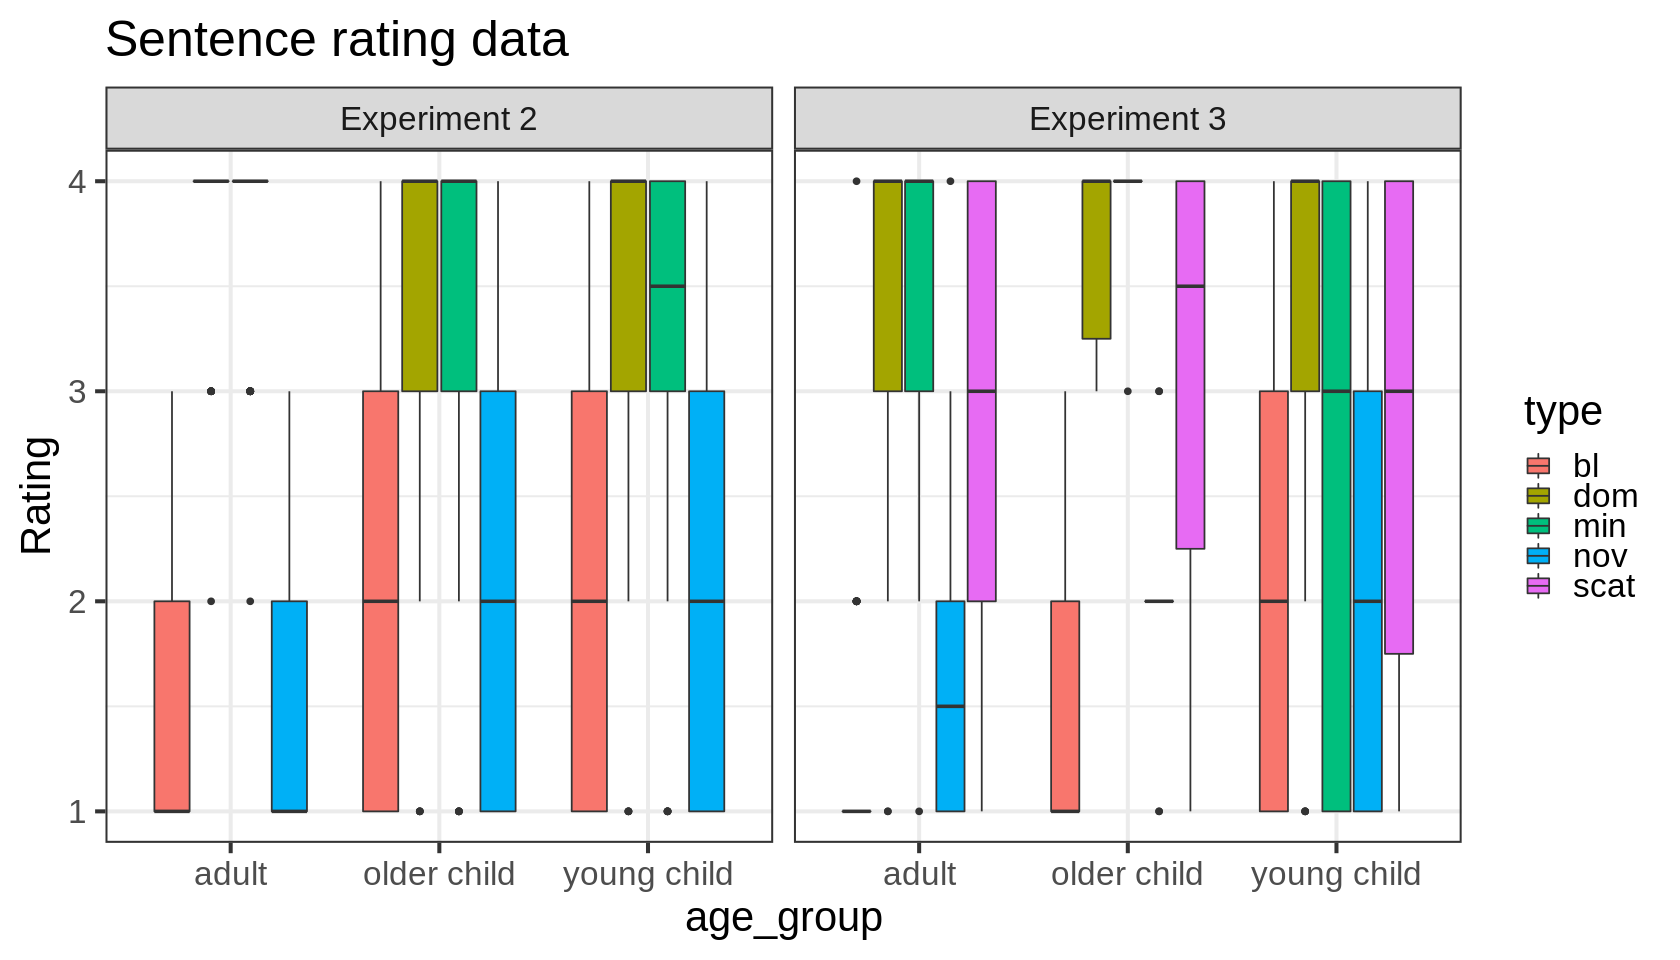

In [ ]:
options(repr.plot.width =14, repr.plot.height =8)

## first, let's see if it looks like there is an interaction between age and type
## looks like no to me.
ggplot(filter(rating, test == "new"), aes(x=age_group, y = Rating)) + geom_boxplot(aes(fill=type)) +
  facet_grid(.~ Exp) + 
  scale_y_continuous(breaks = c(1:4)) + ggtitle ("Sentence rating data")

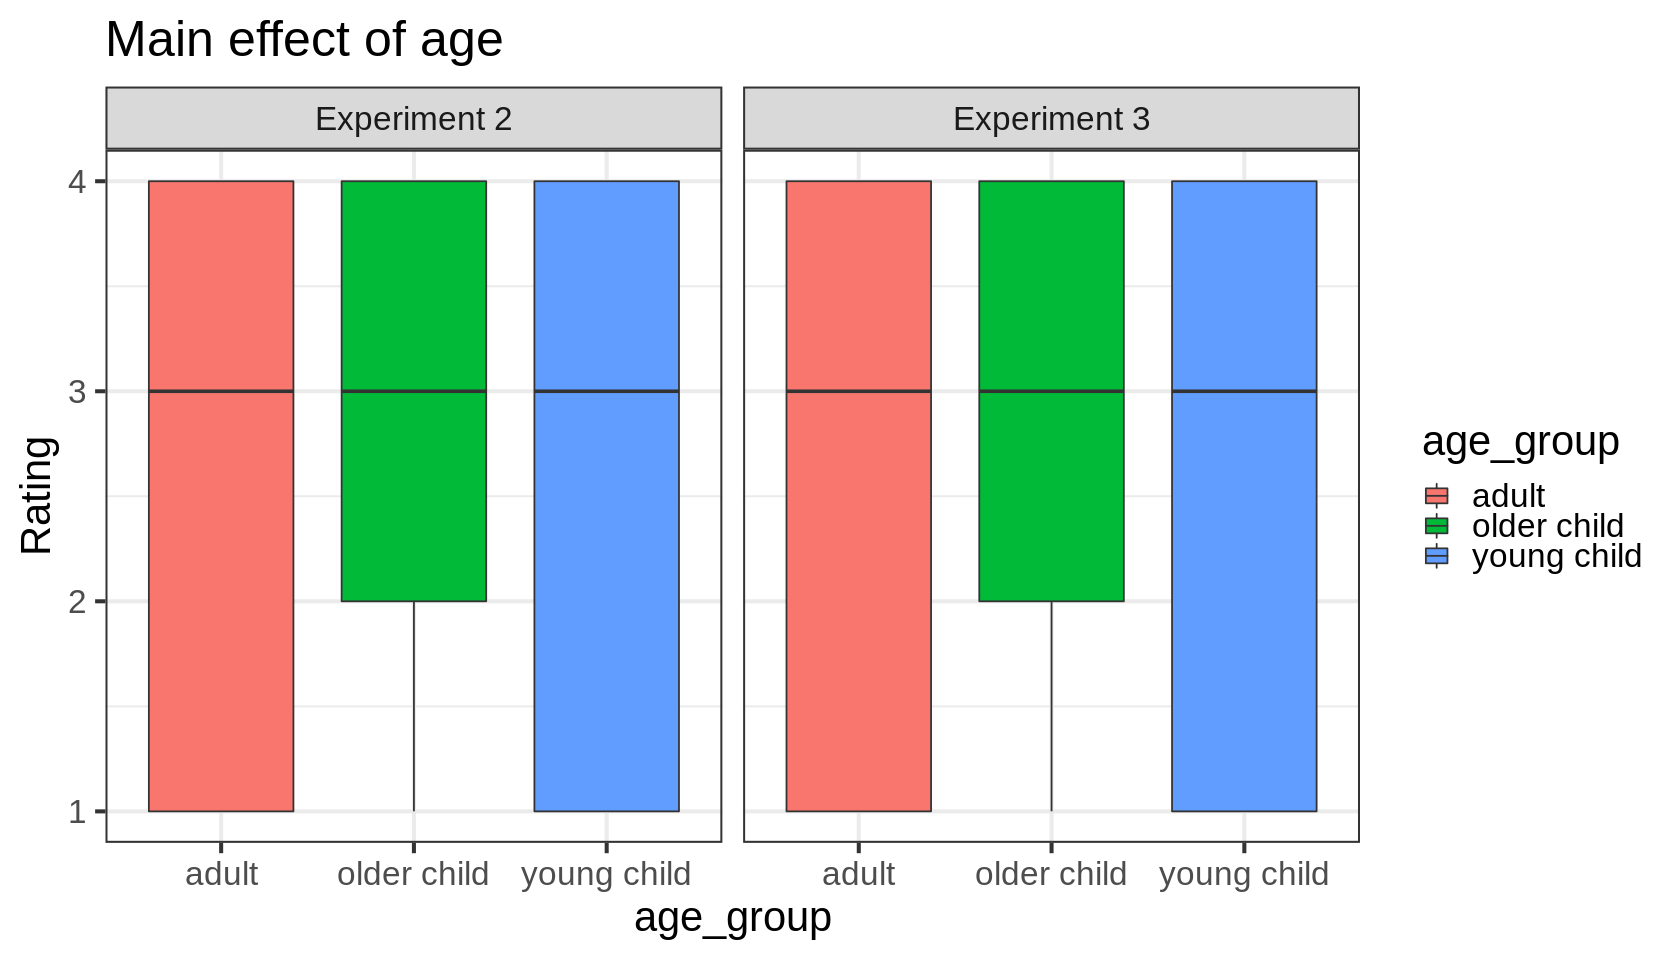

In [ ]:
options(repr.plot.width =14, repr.plot.height =8)

## then let's see if there is a main effect of age; looks like definitely no
ggplot(filter(rating, test == "new"), aes(x=age_group, y = Rating)) + geom_boxplot(aes(fill=age_group)) +
  facet_grid(.~ Exp) + 
  scale_y_continuous(breaks = c(1:4)) + ggtitle ("Main effect of age")

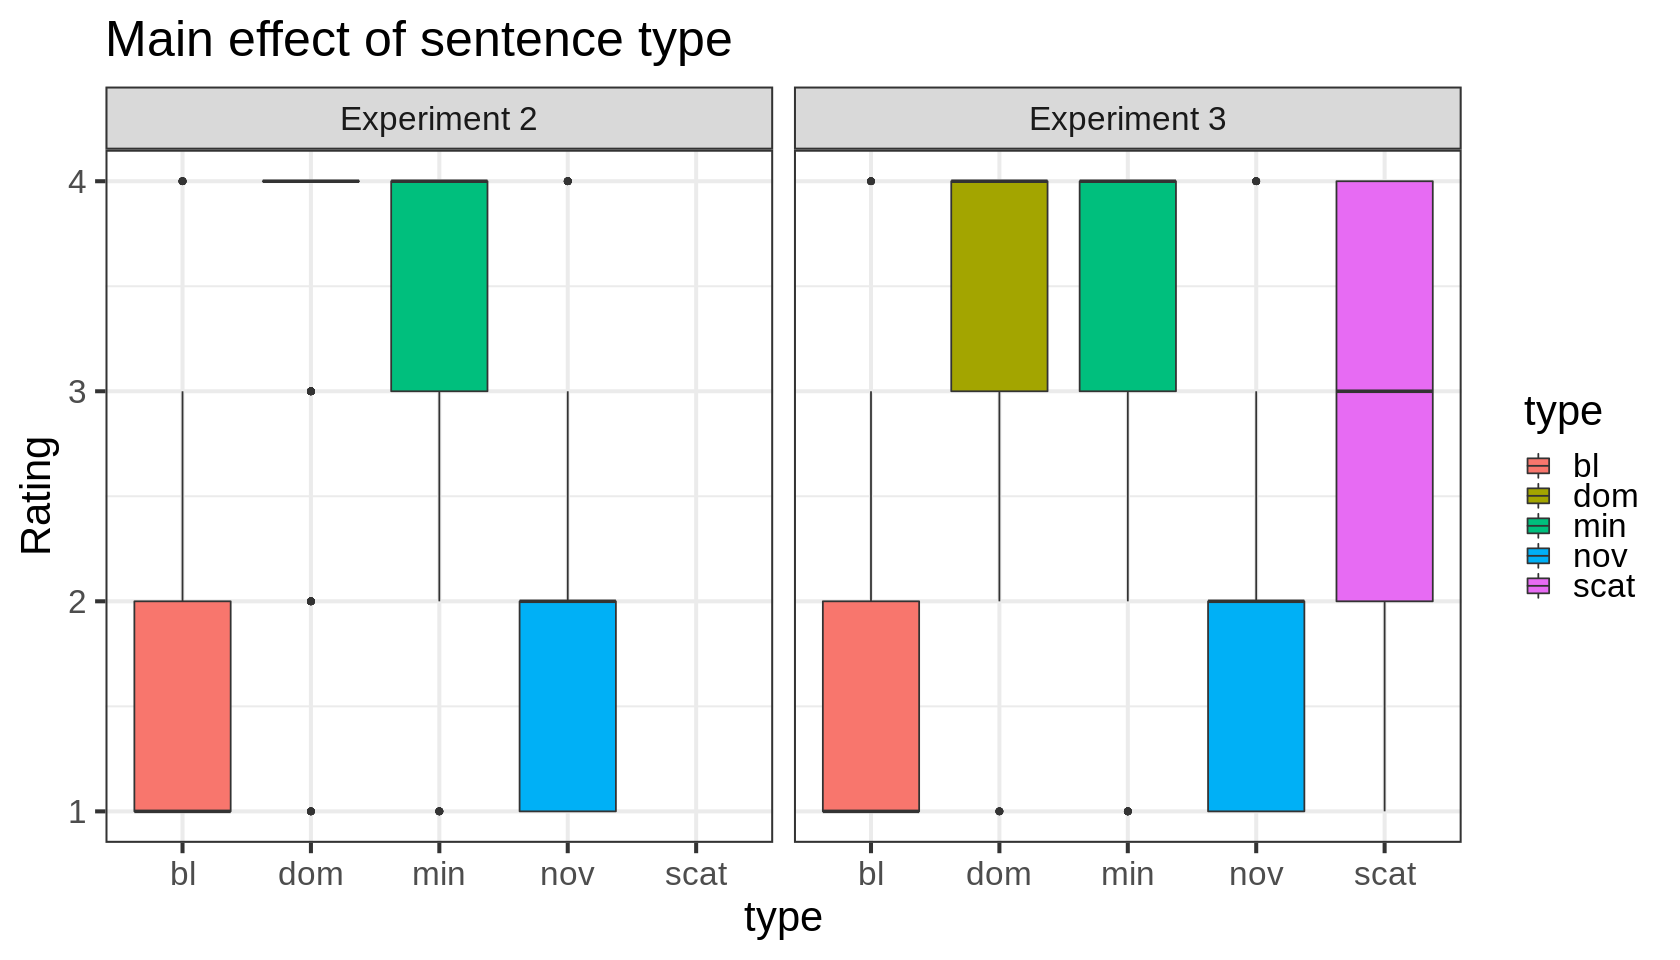

In [ ]:
options(repr.plot.width =14, repr.plot.height =8)

## then let's see if there is a mian effect of type; looks like definitely yes
ggplot(filter(rating, test == "new"), aes(x=type, y = Rating)) + geom_boxplot(aes(fill=type)) +
  facet_grid(.~ Exp) + 
  scale_y_continuous(breaks = c(1:4)) + ggtitle ("Main effect of sentence type")

In [ ]:
olr.max = clmm(as.factor(Rating)~type * age_group + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 2"))
olr.int = clmm(as.factor(Rating)~type + age_group + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 2"))

In [ ]:
summary(olr.max)

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: as.factor(Rating) ~ type * age_group + (1 + type | Subject)
data:    filter(rating, test == "new", Exp == "Experiment 2")

 link  threshold nobs logLik  AIC     niter       max.grad cond.H 
 logit flexible  760  -649.88 1347.76 2457(16453) 1.08e-03 1.2e+03

Random effects:
 Groups  Name        Variance Std.Dev. Corr                 
 Subject (Intercept) 3.7044   1.9247                        
         typedom     5.3769   2.3188   -0.757               
         typemin     6.6050   2.5700   -0.837  0.963        
         typenov     0.5371   0.7329    0.102  0.244 -0.023 
Number of groups:  Subject 30 

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
typedom                        7.5081     1.0578   7.098 1.27e-12 ***
typemin                        6.6562     1.0769   6.181 6.38e-10 ***
typenov                        0.1917     0.4875   0.393  0.69409    
age_groupolder chil

In [ ]:
anova(olr.max, olr.int) 

,no.par,AIC,logLik,LR.stat,df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
olr.int,18,1346.579,-655.2893,NA,NA,NA
olr.max,24,1347.756,-649.8778,10.82314,6,0.09399869


In [ ]:
olr.age = clmm(as.factor(Rating)~type  + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 2"))
olr.type = clmm(as.factor(Rating)~age_group + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 2"))

In [ ]:
anova(olr.int, olr.age) %>% kable



|        | no.par|      AIC|    logLik| LR.stat| df| Pr(>Chisq)|
|:-------|------:|--------:|---------:|-------:|--:|----------:|
|olr.age |     16| 1344.476| -656.2381|      NA| NA|         NA|
|olr.int |     18| 1346.579| -655.2893|  1.8975|  2|  0.3872248|

In [ ]:
anova(olr.int, olr.type) 

,no.par,AIC,logLik,LR.stat,df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
olr.type,15,1382.125,-676.0626,NA,NA,NA
olr.int,18,1346.579,-655.2893,41.54652,3,5.007203e-09


In [ ]:
olr3 = clmm(as.factor(Rating)~type * age_group + (1|Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 3"))

In [ ]:
olr.max3 = clmm(as.factor(Rating)~type * age_group + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 3"))
olr.int3 = clmm(as.factor(Rating)~type + age_group + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 3"))

In [ ]:
summary(olr.max3)

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: as.factor(Rating) ~ type * age_group + (1 + type | Subject)
data:    filter(rating, test == "new", Exp == "Experiment 3")

 link  threshold nobs logLik  AIC     niter       max.grad cond.H 
 logit flexible  650  -619.90 1303.79 6734(27822) 1.99e-04 3.1e+03

Random effects:
 Groups  Name        Variance Std.Dev. Corr                        
 Subject (Intercept) 2.476    1.5735                               
         typedom     9.045    3.0076   -0.863                      
         typemin     6.158    2.4815   -0.892  0.998               
         typenov     0.184    0.4289   -0.941  0.641  0.687        
         typescat    2.231    1.4937   -0.798  0.993  0.984  0.547 
Number of groups:  Subject 18 

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
typedom                        6.755200   1.233891   5.475 4.38e-08 ***
typemin                        6.315668   1.042454  

In [ ]:
anova(olr.max3, olr.int3) 

,no.par,AIC,logLik,LR.stat,df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
olr.int3,24,1305.928,-628.9639,NA,NA,NA
olr.max3,32,1303.791,-619.8957,18.13635,8,0.02022718


In [ ]:
olr.age3 = clmm(as.factor(Rating)~type  + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 3"))
olr.type3 = clmm(as.factor(Rating)~age_group + (1 + type | Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 3"))

In [ ]:
anova(olr.int3, olr.age3) %>% kable



|         | no.par|      AIC|    logLik|  LR.stat| df| Pr(>Chisq)|
|:--------|------:|--------:|---------:|--------:|--:|----------:|
|olr.age3 |     22| 1304.757| -630.3786|       NA| NA|         NA|
|olr.int3 |     24| 1305.928| -628.9639| 2.829285|  2|  0.2430125|

In [ ]:
anova(olr.int3, olr.type3) 

,no.par,AIC,logLik,LR.stat,df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
olr.type3,20,1320.208,-640.1038,NA,NA,NA
olr.int3,24,1305.928,-628.9639,22.27985,4,0.0001762819


In [ ]:
olr3young = clmm(as.factor(Rating)~type + (1|Subject), 
            data = filter(rating, test == "new", Exp == "Experiment 3", age_group == "young child"))

In [ ]:
summary(olr3young)

Cumulative Link Mixed Model fitted with the Laplace approximation

formula: as.factor(Rating) ~ type + (1 | Subject)
data:    filter(rating, test == "new", Exp == "Experiment 3", age_group ==  
    "young child")

 link  threshold nobs logLik  AIC    niter    max.grad cond.H 
 logit flexible  200  -250.62 517.24 429(860) 2.69e-05 1.4e+02

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.05613  0.2369  
Number of groups:  Subject 8 

Coefficients:
         Estimate Std. Error z value Pr(>|z|)    
typedom   1.95012    0.43494   4.484 7.34e-06 ***
typemin   0.92599    0.41339   2.240  0.02509 *  
typenov   0.09776    0.41511   0.236  0.81381    
typescat  1.13739    0.41525   2.739  0.00616 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Threshold coefficients:
    Estimate Std. Error z value
1|2 -0.05404    0.30791  -0.176
2|3  0.73582    0.31136   2.363
3|4  1.50136    0.32477   4.623

In [ ]:
ggpredictions_olr = data.frame(ggpredict(olr, terms = c("sentence", "age_group")))
colnames(ggpredictions_olr)[c(1, 6, 7)] = c("sentence", "Rating", "age_group")

In [ ]:
ggpredictions_olr3 = data.frame(ggpredict(olr3, terms = c("sentence", "age_group")))
colnames(ggpredictions_olr3)[c(1, 6, 7)] = c("sentence", "Rating", "age_group")

In [ ]:
options(repr.plot.width =12, repr.plot.height =8)

#raw data
rating %>% 
  mutate(Rating = ordered(Rating, levels=levels(Rating))) %>% 
  ggplot( aes(x = sentence, fill = Rating)) + 
  geom_bar(position = "fill") + 
  facet_grid(.~age_group) + 
  scale_fill_grey(start = 0.8, end = 0.2) +

  #scale_fill_manual(values = cbPalette) + 
  ggtitle("Raw Data")

In [ ]:
options(repr.plot.width =12, repr.plot.height =8)

#raw data
rating3 %>% 
  mutate(Rating = ordered(Rating, levels=levels(Rating))) %>% 
  ggplot( aes(x = sentence, fill = Rating)) + 
  geom_bar(position = "fill") + 
  facet_grid(.~age_group) + 
  scale_fill_grey(start = 0.8, end = 0.2) +

  #scale_fill_manual(values = cbPalette) + 
  ggtitle("Raw Data")

In [ ]:
levels(rating3$sentence)

In [ ]:
options(repr.plot.width =12, repr.plot.height =8)

#raw data
ggpredictions_olr %>% 
  mutate(Rating = ordered(Rating, levels=levels(Rating))) %>% 
  ggplot(aes(x = sentence, y = predicted, fill = Rating)) + 
  geom_bar(position = "fill", stat = "identity") + 
  facet_grid(.~age_group) + 
  scale_fill_grey(start = 0.8, end = 0.2) +
  #scale_fill_manual(values = cbPalette) + 
  ggtitle("Raw Data")

In [ ]:
options(repr.plot.width =12, repr.plot.height =8)

#raw data
ggpredictions_olr3 %>% 
  mutate(Rating = ordered(Rating, levels=levels(Rating))) %>% 
  ggplot(aes(x = sentence, y = predicted, fill = Rating)) + 
  geom_bar(position = "fill", stat = "identity") + 
  facet_grid(.~age_group) + 
  scale_fill_grey(start = 0.8, end = 0.2) +
  #scale_fill_manual(values = cbPalette) + 
  ggtitle("Raw Data")

### Rating


In [ ]:
# group all 'novel' trials together and then normalize (z-score)
# get mean z-score for each trial type
rating4020_normed_trials <- rating4020 %>%
  mutate(type = ifelse(`Sentence Manipulation` %in% c("novb", "novt", "novc", "novv"), 'nov', `Sentence Manipulation`),
          test = ifelse(type %in% c("bl", "dom", "min", "nov", "scat"), "new", "old")) %>%
  group_by(Distribution, Subject, age_group, test) %>%
  mutate(z_score = scale(Rating)) 
  
rating4020_normed <- rating4020_normed_trials %>%
  group_by(Distribution, Subject, age_group, test, type) %>%
  summarise(n = n(), mean_z=mean(z_score))
  

In [ ]:
# there were two version of the rating test, see how many people got the old one
# and keep only data from the new one (mark old with NA)
rating4020_normed_wide <- rating4020_normed %>% 
  spread(type, mean_z) %>%
  select(Distribution:test, bl, dom, min, nov, scat) %>%
  full_join(production4020, by = c("Distribution", "Subject")) %>%
  select(Distribution, ageLevel, age_group, Subject, test, mean, sd, bl:scat) %>%
  arrange(ageLevel, test, mean)

In [ ]:
# see everyone with production and rating data
rating4020_normed_wide %>% kable

In [ ]:
# get mean z-score for each type by age level
# and take out the two young kids that were excluded from analysis
rating4020_group <-  rating4020_normed %>%
  filter(test == "new", !(Subject %in% c("C203", "C259"))) %>%
  group_by(age_group, type) %>%
  summarise(n = n(), mean = mean(mean_z), sd = sd(mean_z), sem = sd/sqrt(n)) %>%
  mutate(type = factor(type, labels = c("Omitted", "Dominant", "Minority", "Novel", "Scatter")))


In [ ]:
rating4020_group %>% kable

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(rating4020_group, aes(x = type, y = mean)) +
  facet_grid(.~age_group) +
  geom_bar(stat = "identity", position = position_dodge()) +
  geom_errorbar(aes(ymin = mean - sem, ymax = mean + sem),
                  position = position_dodge(width = 0.9), width = 0.25)+
  theme_bw() + 
  xlab("Determiner Manipulation") +
  ylab("Mean z-score") +
  theme(axis.text.x = element_text(angle = 45, hjust =1))

In [ ]:
rating4020_normed %>%
  #mutate(type = factor(type, labels = c("Omitted", "Dominant", "Minority", "Novel", "Scatter"))) %>%
  filter(test == "new", !(Subject %in% c("C203", "C259"))) %>%
  filter(type %in% c("dom", "min")) %>%
  select(Distribution, age_group, Subject, type, mean_z) %>%
  spread(type, mean_z) %>%
  group_by(Distribution, age_group) %>%
  do(tidy(t.test(x=.$dom, y=.$min,  data=.,  paired=TRUE))) %>%
  kable
